# Exercise 3
In this exercise you will explore two ways of dealing with overfitting --- the first, model selection (one that you have explored before), and the second, regularization.
For this we will use synthetic data and try to fit a polynomial to this data using regression.

## Creating the Data
Run the following code to create the data. This creates a synthetic dataset by adding some random Gaussian noise to a sinusoidal function. Note we used a specific seed so that the generated data would be identical in all runs.

Note: in this exercise you should **use the test set as a validation set**, as we will not care about reporting an approximation for the generalization error of our model.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

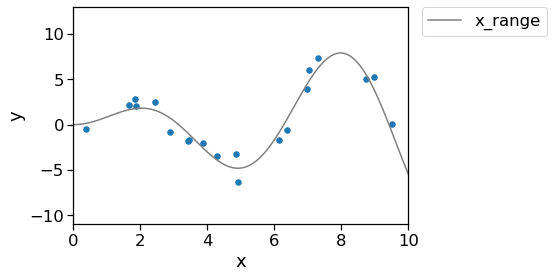

In [39]:
def f(x):
    return x * np.sin(x)

def plot_fit(ax, X_train=None, y_train=None, model=None, label=None):
  min_x, max_x = np.floor(min(X_train)), np.ceil(max(X_train))
  x_range = np.linspace(min_x, max_x, 100)
  y = f(x_range)
  min_y, max_y = np.floor(min(y))-5, np.ceil(max(y))+5
  ax.plot(x_range, y, color='gray',label='x_range')
  if X_train is not None and y_train is not None:
    ax.scatter(X_train, y_train, s=30,label=label)
  if model is not None:
    ax.plot(x_range, model.predict(x_range), color='black', label=label)
  ax.set_ylim((min_y, max_y))
  ax.set_xlim((min_x, max_x))
  ax.set_ylabel('y')
  ax.set_xlabel('x')
  plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0.);

def create_data(n_samples = 100, test_size=0.8, min_x=0, max_x=10, err_scale=1):
  np.random.seed(9)
  X = np.random.uniform(min_x, max_x, size=n_samples)[:, np.newaxis]
  S = np.random.normal(loc=0, scale=err_scale, size=n_samples)[:, np.newaxis] # loc is mean, and scale is std
  y = f(X) + S
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
  return X_train, X_test, y_train, y_test

# generate data
X_train, X_test, y_train, y_test = create_data()
plot_fit(plt.gca(), X_train, y_train)


## Polynomial Regression - Model Selection

### Questions:
<b>1. Apply polynomial regression to the data, using polynomials with maximal degree of 0 to 11.  <br> Plot the fitted polynomial against the training data and the underlying generating function (that is, for each fitted polynomial, plot that polynomial on top of a graph similar to the one plotted above).<br>**Hint:** Use *sklearn.preprocessing.PolynomialFeatures* and *sklearn.linear_model.LinearRegression*.
</b>

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.ticker as ticker
from numpy import linalg as LA

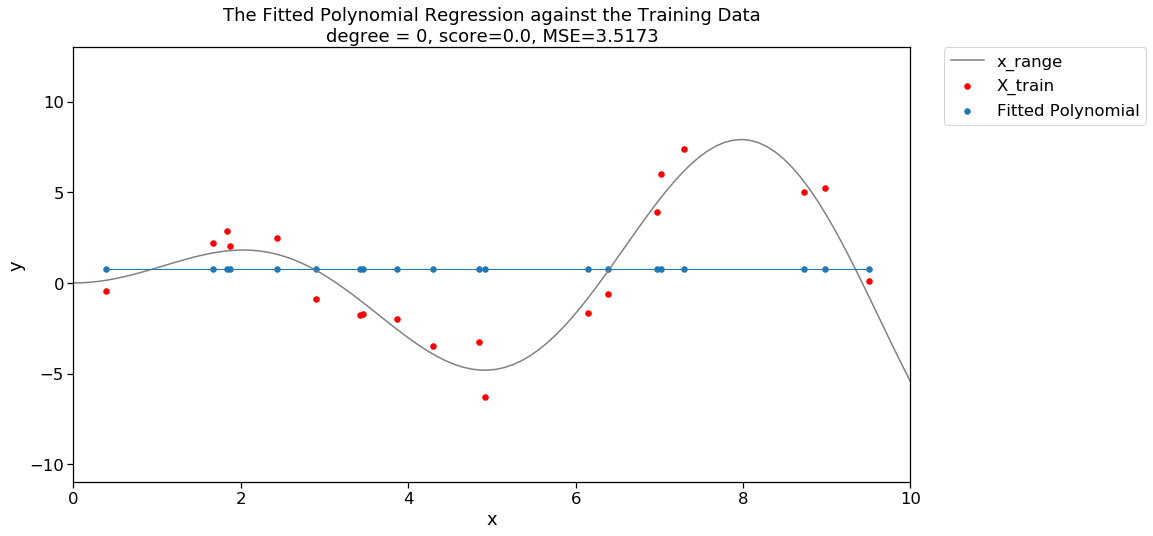

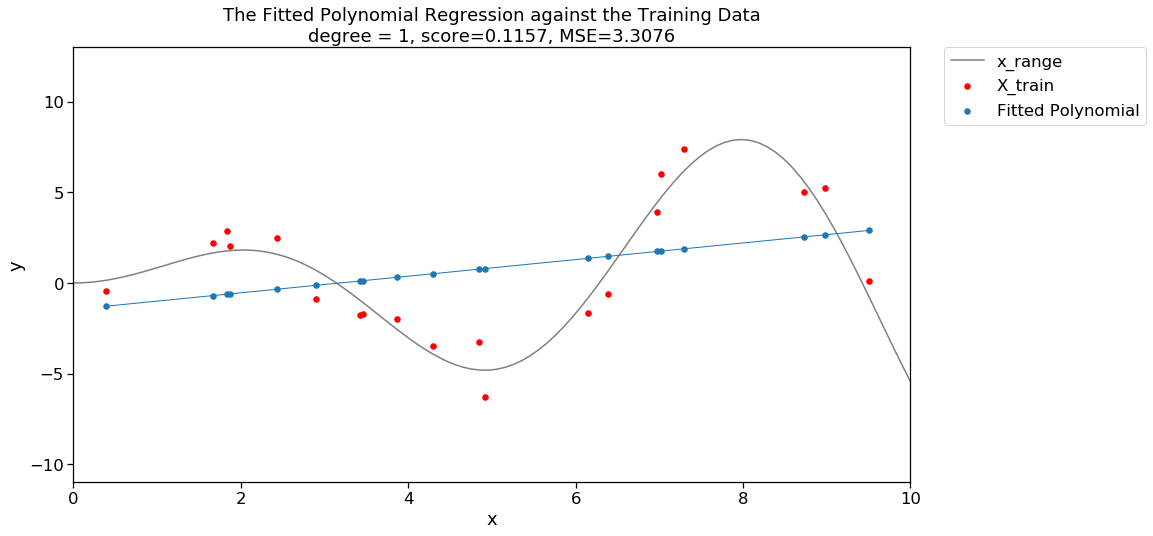

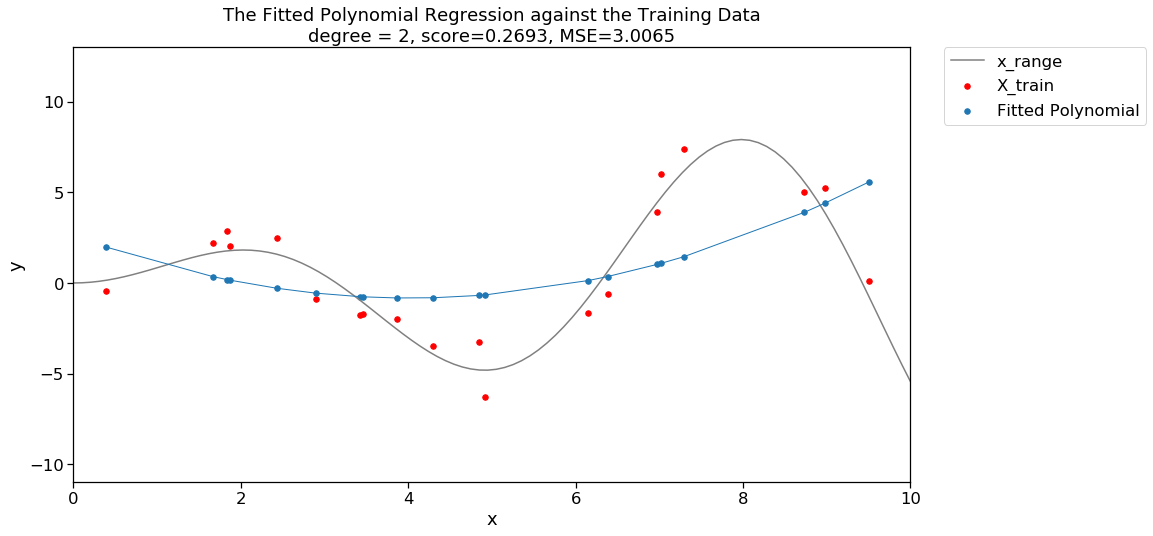

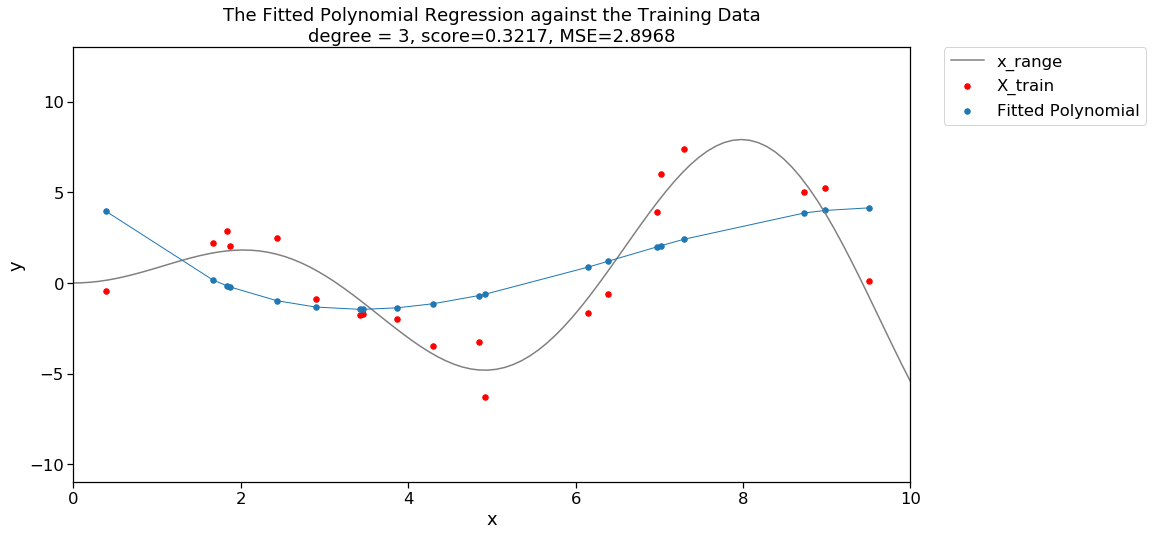

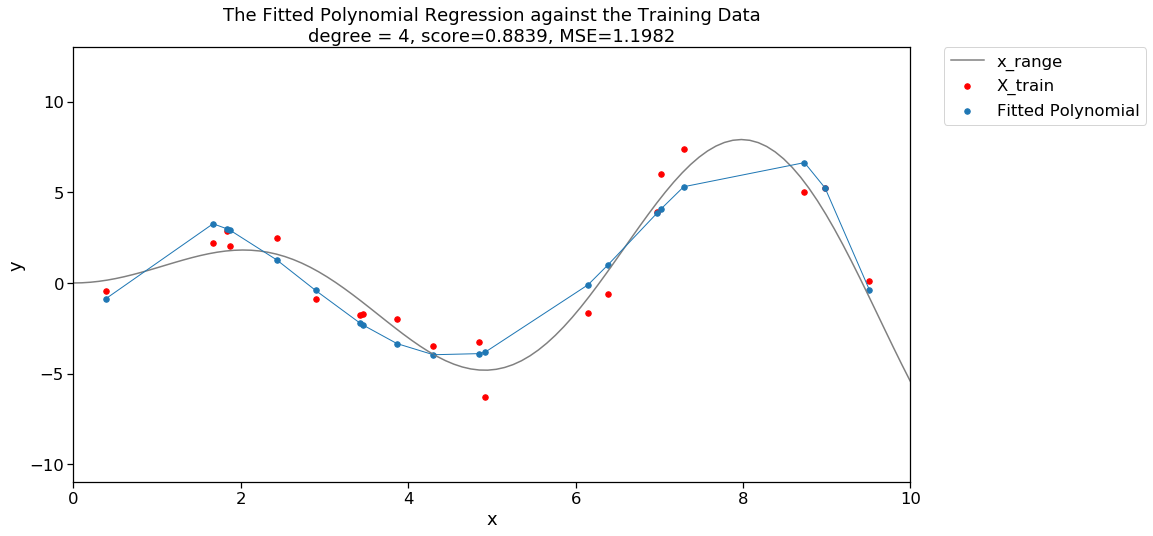

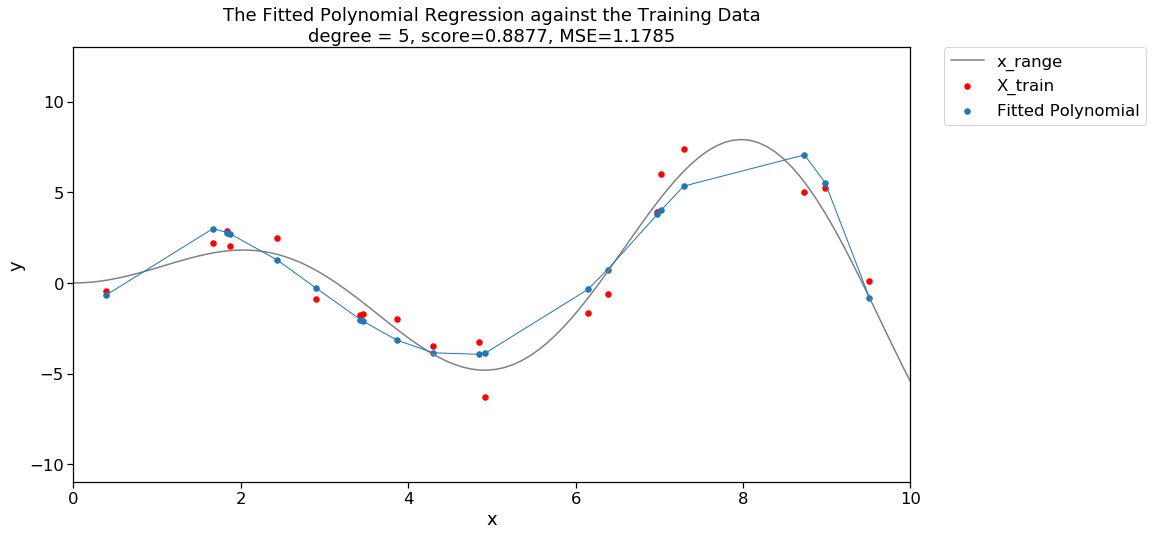

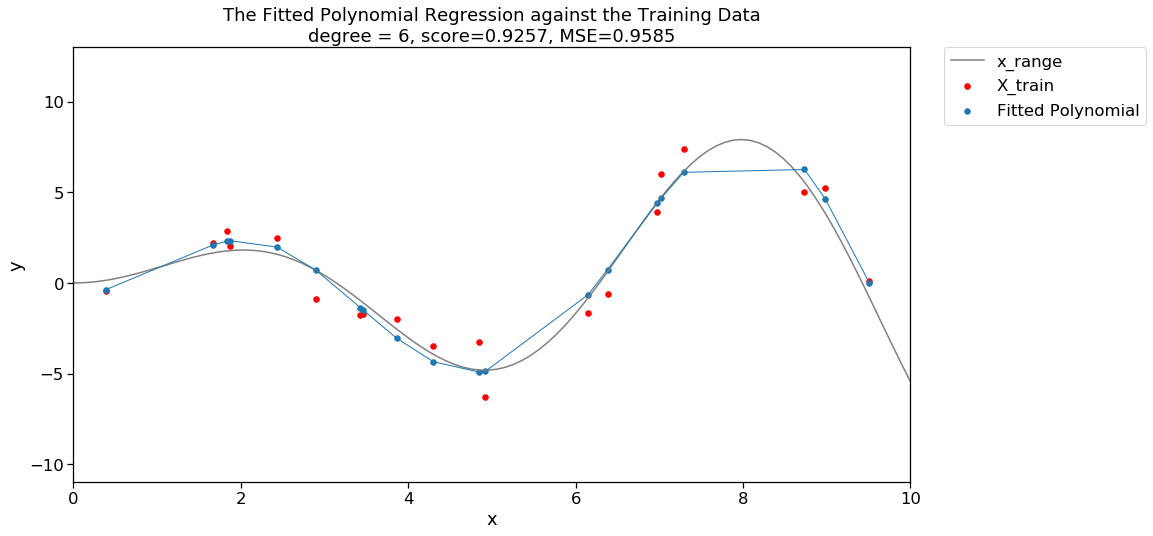

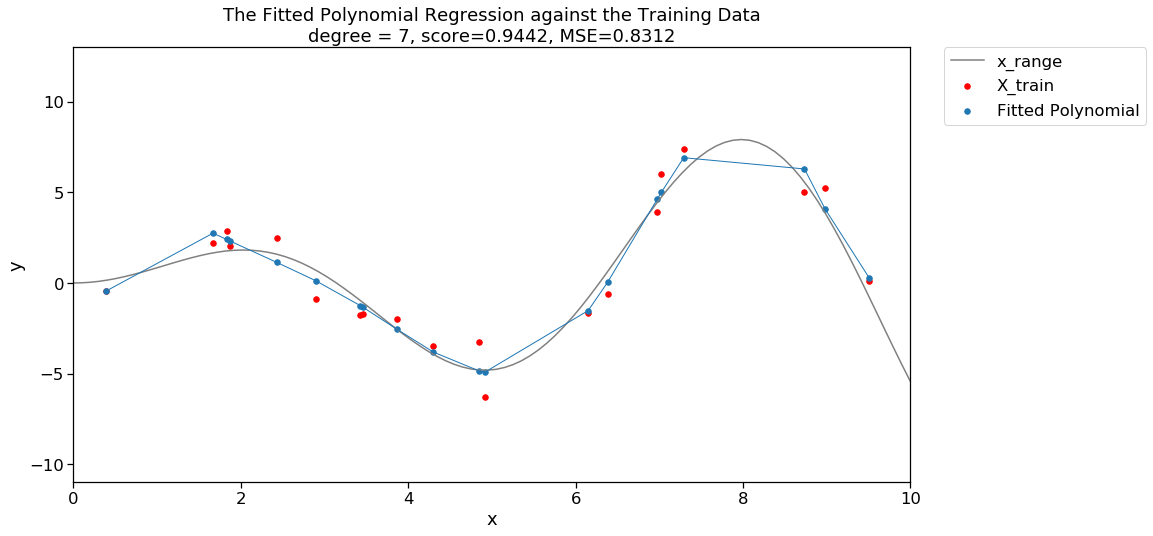

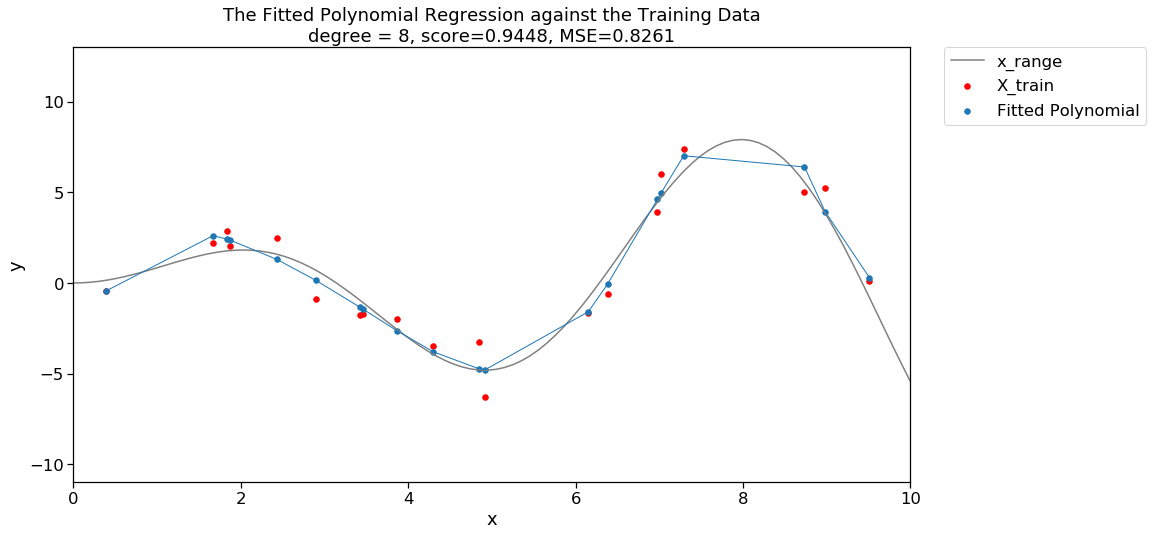

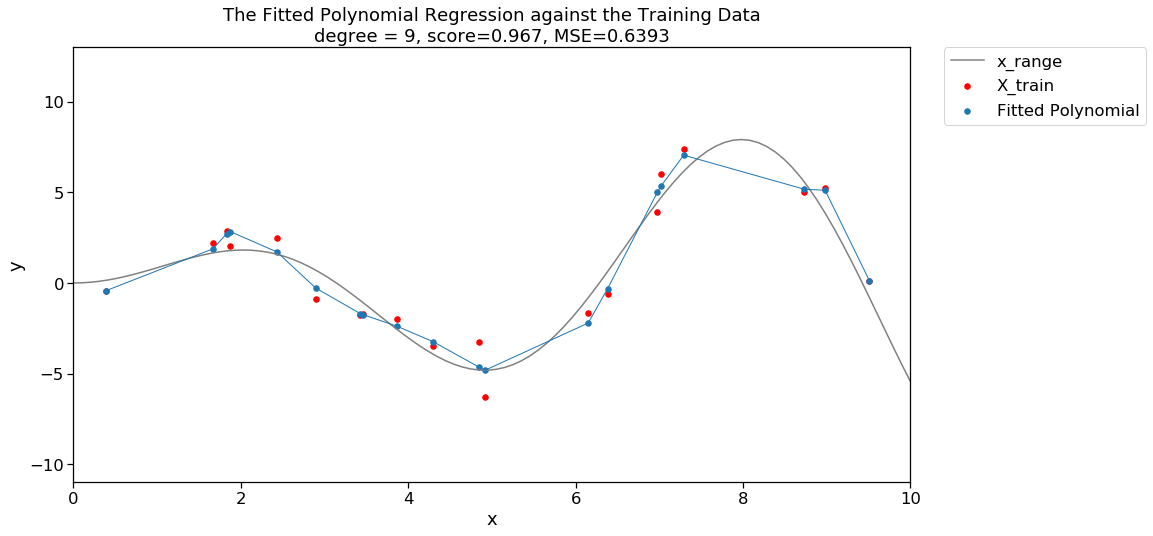

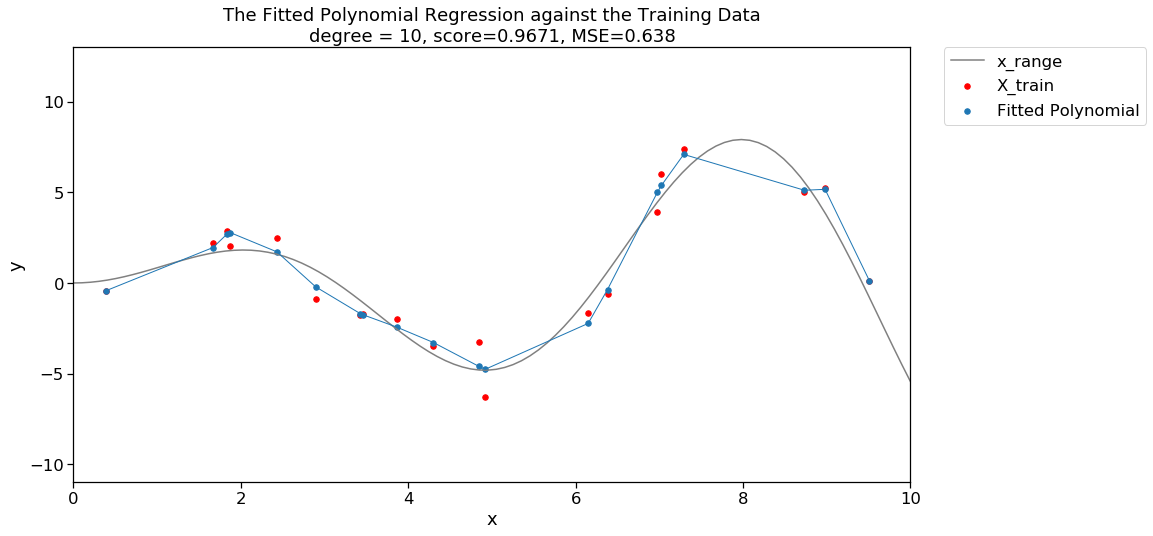

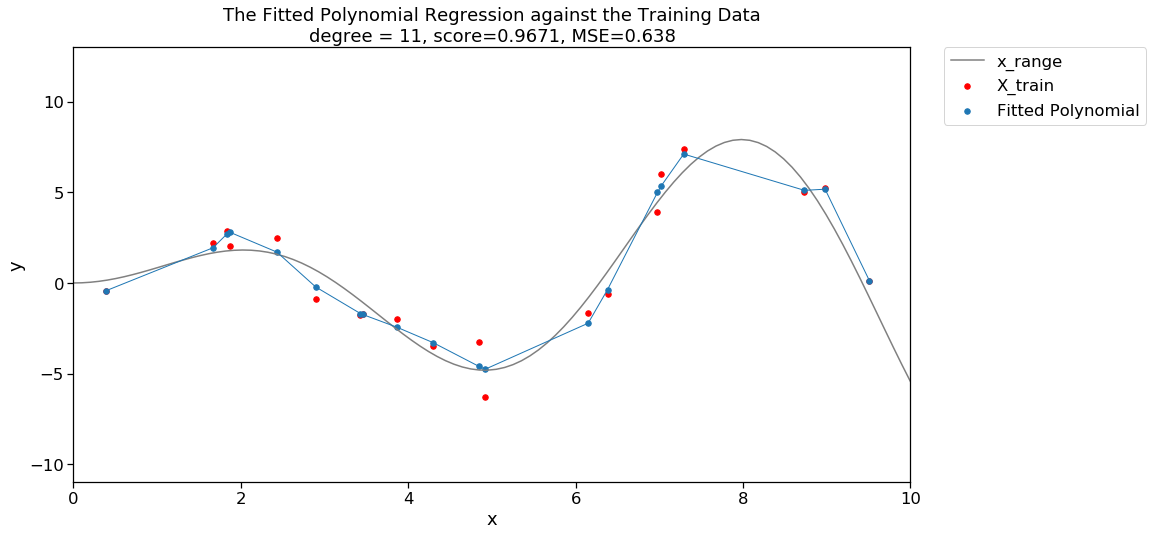

In [46]:
for i in range(12):
    #Apply polynomial regression to the data,
    poly_features = PolynomialFeatures(degree=i)
    X_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_poly,y_train)
    lin_reg_pred = poly_model.predict(X_poly)

    train_score = poly_model.score(X_poly, y_train)
    train_mse = np.sqrt(mean_squared_error(y_train, lin_reg_pred))

    #Plot the fitted polynomial against the training data
    idxs = X_train.flatten().argsort()
    lin_reg_pred = lin_reg_pred[idxs]
    
    plt.subplots(figsize=(15,8))
    plt.scatter(X_train, y_train, s=30,c='r', label='X_train')

    plot_fit(plt.gca(), X_train[idxs], lin_reg_pred,label='Fitted Polynomial')
    plt.plot(X_train[idxs],lin_reg_pred,label='X_train', linewidth=1)
    plt.title(f'The Fitted Polynomial Regression against the Training Data\ndegree = {str(i)}, score={round(train_score,4)}, MSE={round(train_mse,4)}')
    plt.xlabel('x')
    plt.ylabel('y')
    #


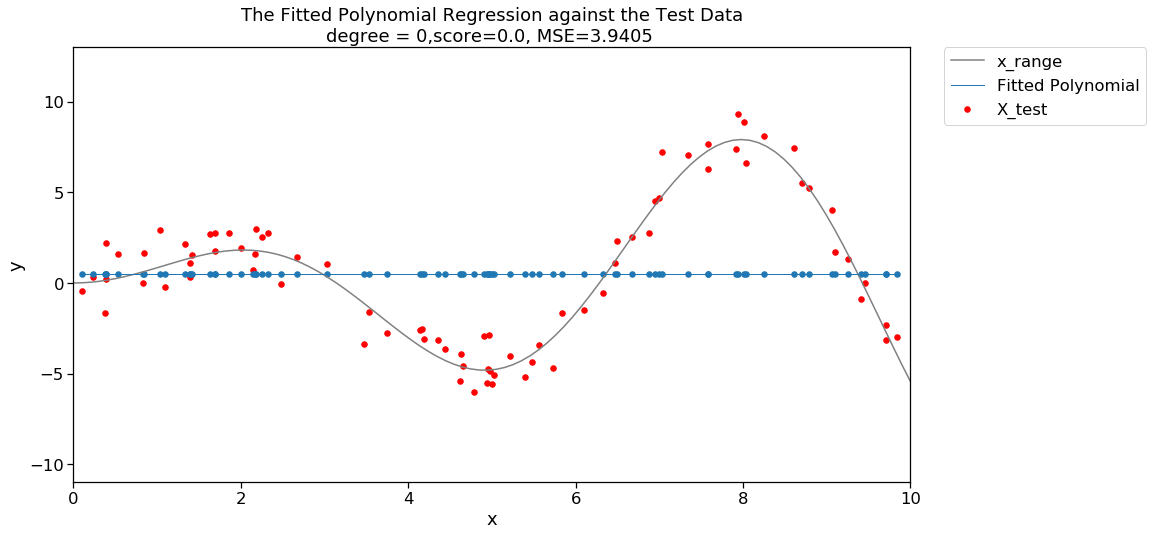

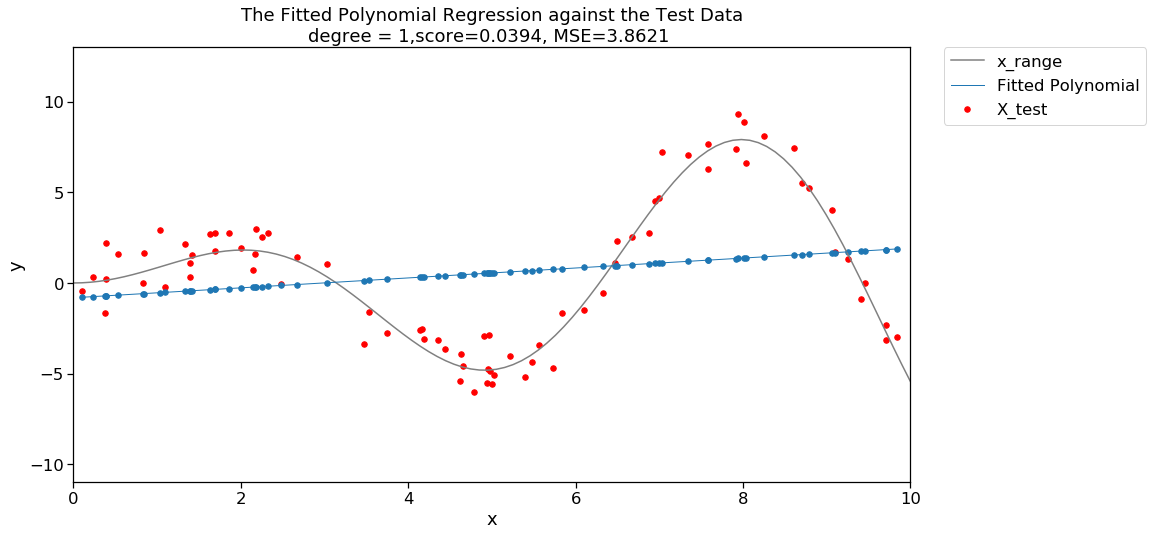

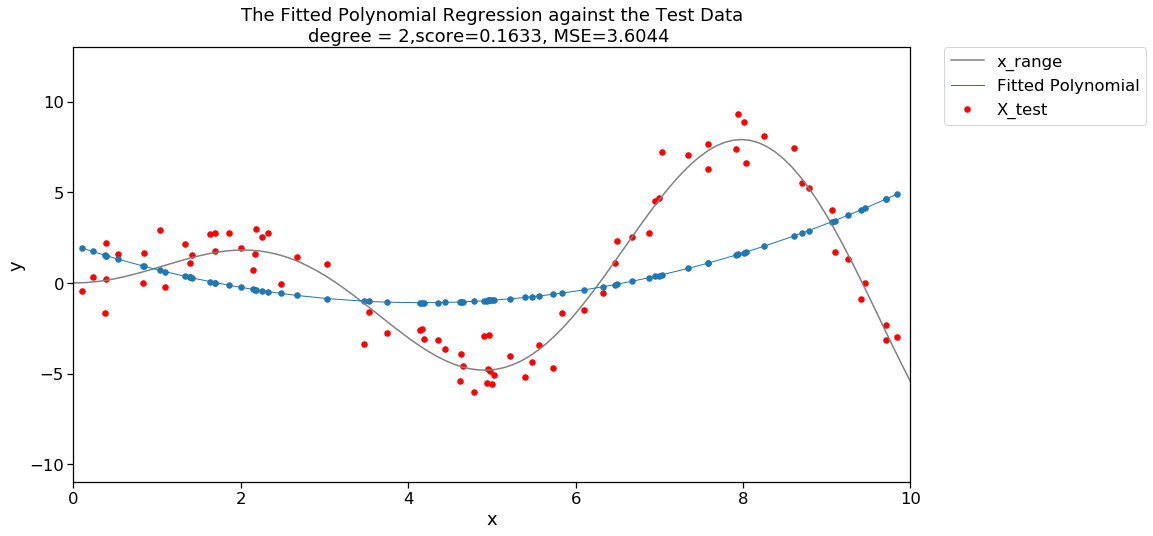

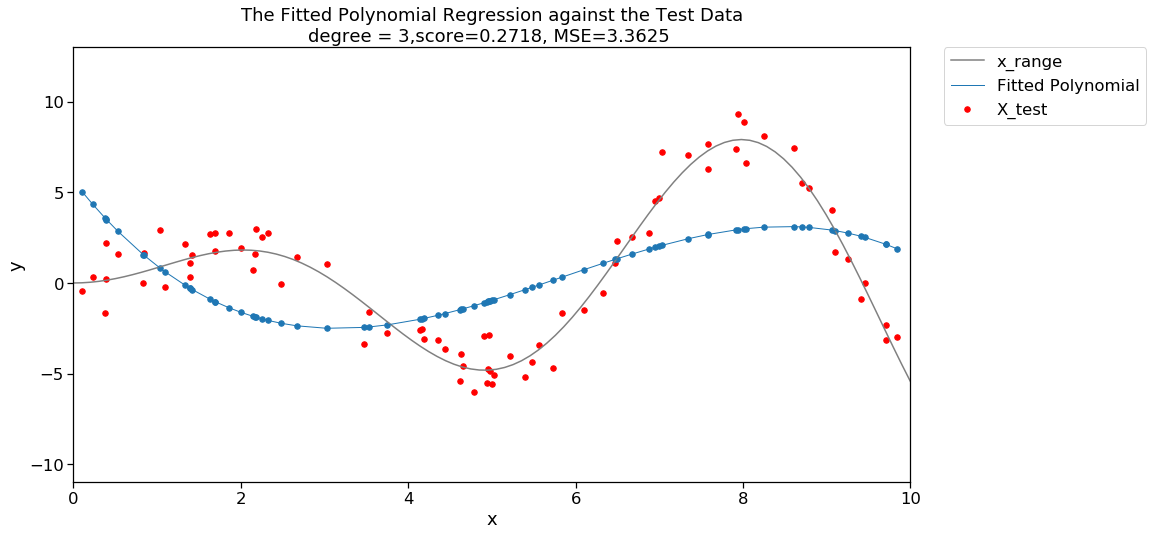

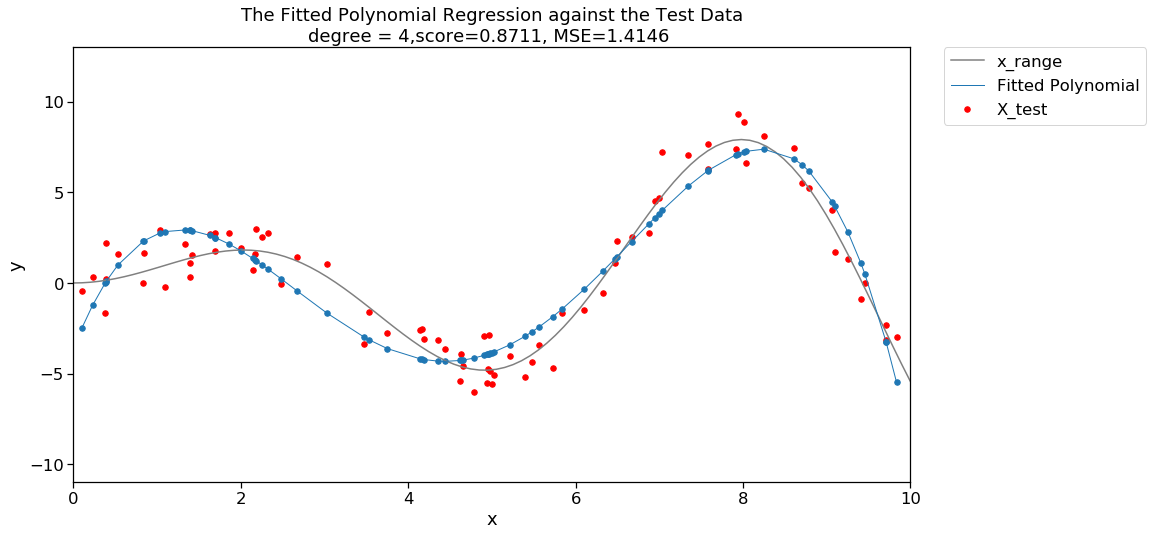

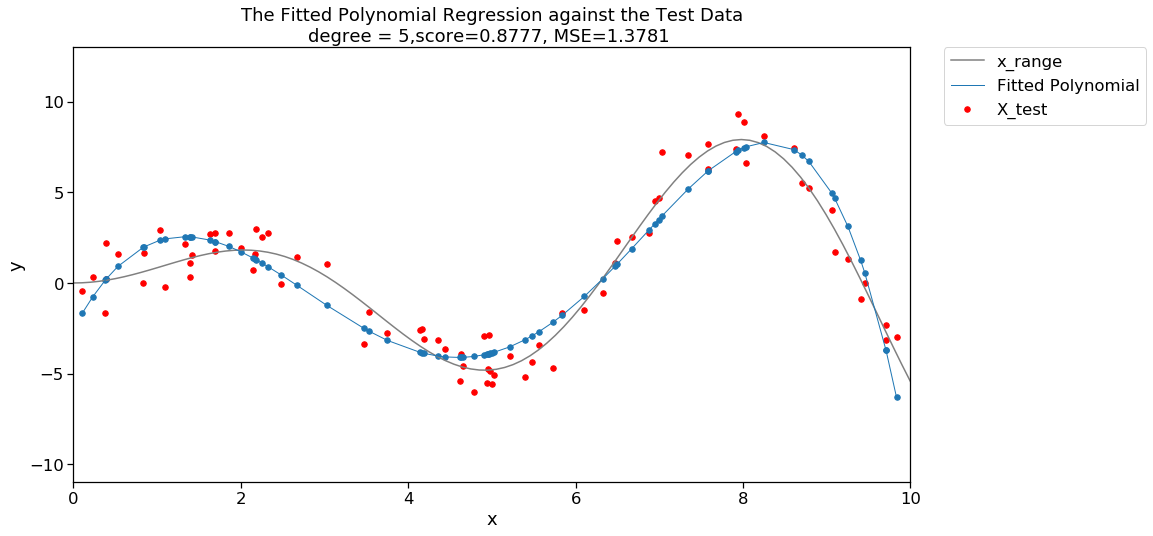

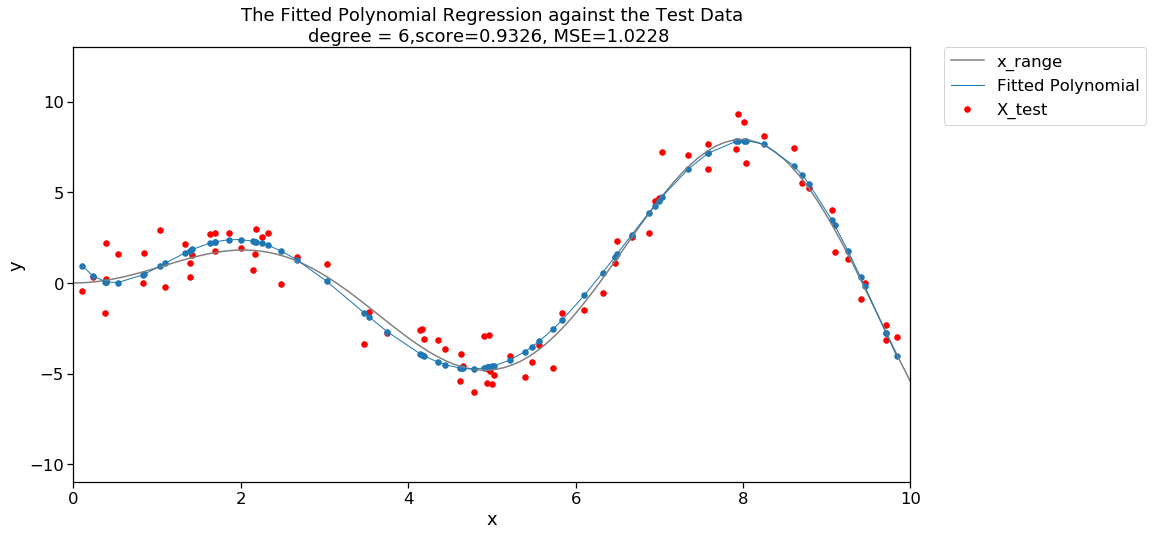

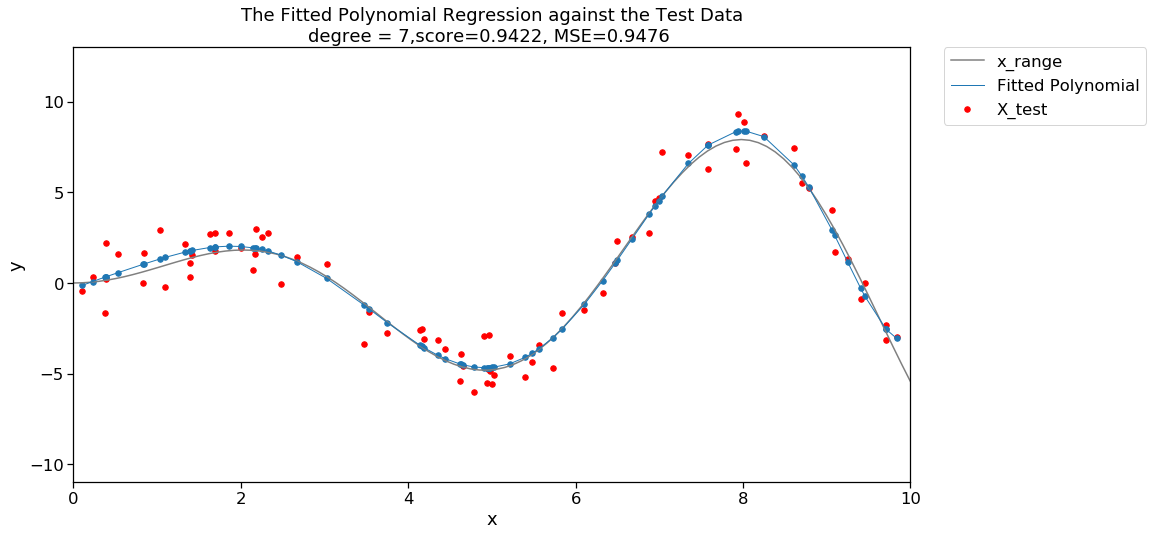

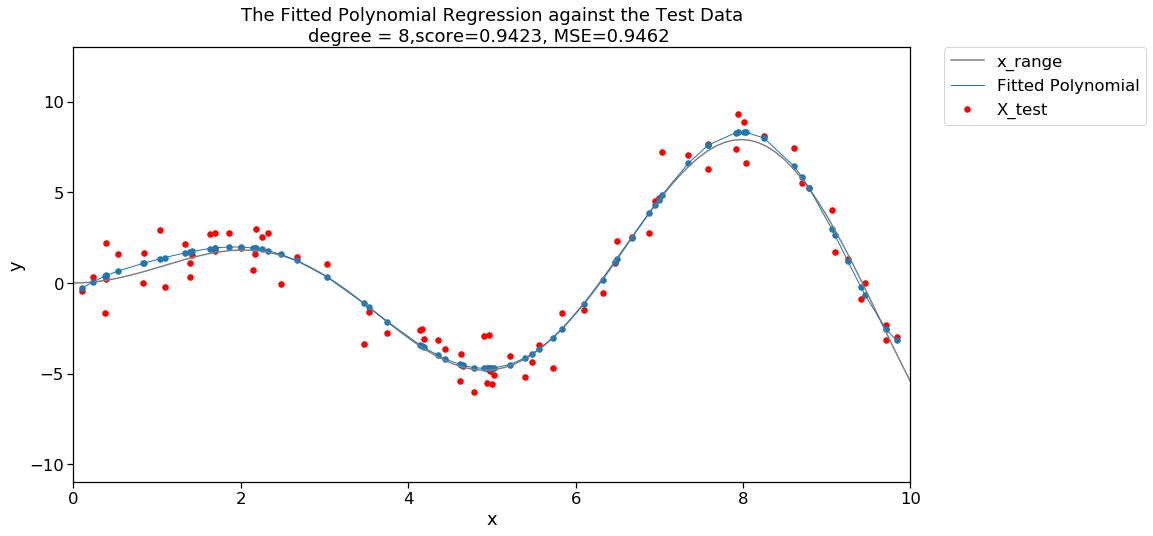

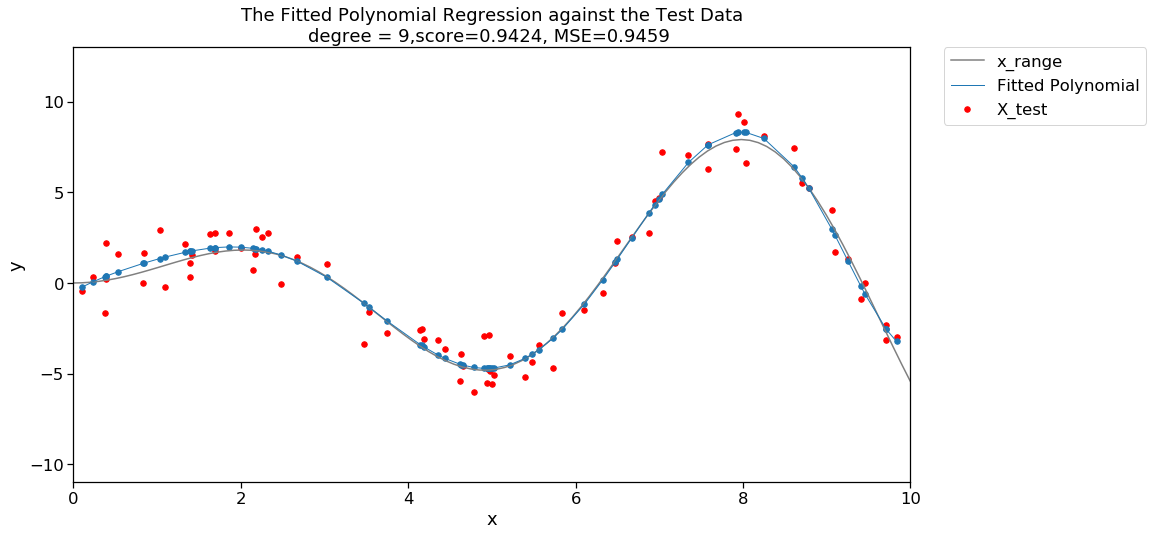

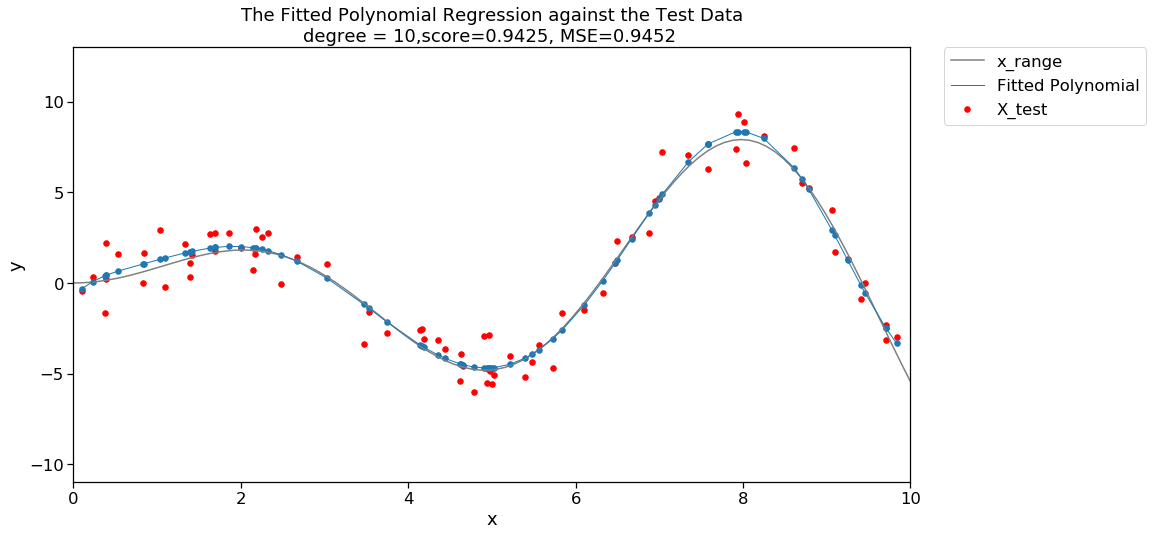

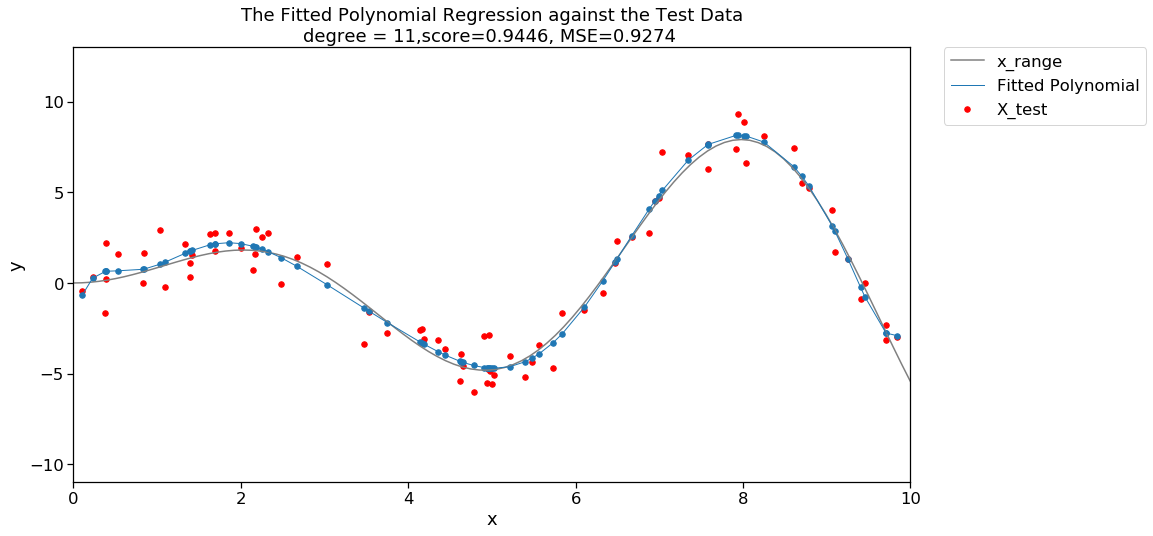

In [52]:

for i in range(12):
    #Apply polynomial regression to the data,
    poly_features = PolynomialFeatures(degree=i)
    X_poly = poly_features.fit_transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_poly,y_test)
    lin_reg_pred = poly_model.predict(X_poly)

    test_score = poly_model.score(X_poly, y_test)
    test_mse = np.sqrt(mean_squared_error(y_test, lin_reg_pred))

    
    #Plot the fitted polynomial against the training data
    idxs = X_test.flatten().argsort()
    lin_reg_pred = lin_reg_pred[idxs]
    plt.subplots(figsize=(15,8))
    plt.scatter(X_test, y_test, s=30,c='r', label='X_test')

    plot_fit(plt.gca(), X_test[idxs], lin_reg_pred)
    plt.plot(X_test[idxs],lin_reg_pred,label='Fitted Polynomial', linewidth=1)
    plt.title(f'The Fitted Polynomial Regression against the Test Data\ndegree = {str(i)},score={round(test_score,4)}, MSE={round(test_mse,4)} ')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0.);


#### 2. Do you see underfitting or overfitting?

The models have polynomial features of different degrees. We can see that a linear function (polynomial with **degree 0-5**) is not sufficient to fit the training samples. This is **underfitting**. A polynomial of **degree 6** approximates the **true function** almost perfectly. However, **for higher degrees** the model will **overfit** the training data, i.e. it learns the noise of the training data

#### Which is the best degree for this model?


According to the plot, the best degree for this model is 6 (using Test set)

#### 3. Apply model selection technique by choosing the polynomial degree hyperparameter that gives minimum mean squared error on the training data. <br>**Hint:** Use *sklearn.metrics.mean_squared_error*.

The optimal train_degree = 11
The optimal test_degree = 6


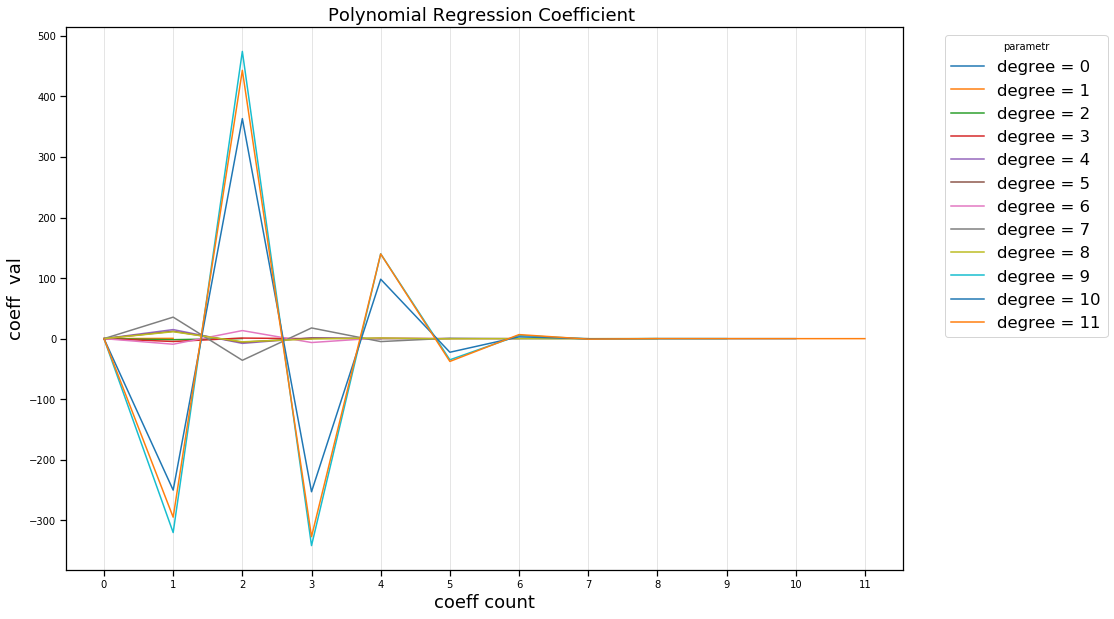

In [53]:
degree_list = list(range(12))
mse_train = []
mse_test = []
fig,ax  = plt.subplots(figsize=(15,10))  

for i in degree_list:
    #Apply polynomial regression to the data,
    poly_features = PolynomialFeatures(degree=i)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
  
    # predicting on training data-set,test data-set
    y_train_predict = poly_model.predict(X_train_poly)
    y_test_predict = poly_model.predict(X_test_poly)
    
  
    # evaluating the model on training dataset, test dataset
    mse_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
    mse_test.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))
    
#plot the coeff
    plt.plot(range(len(poly_model.coef_.flatten())),poly_model.coef_.flatten(),label=f'degree = {str(i)}')
    ax.set(xlabel='coeff count', ylabel='coeff  val',title='Polynomial Regression Coefficient ')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title = 'parametr', bbox_to_anchor=(1.04, 1),loc='upper left')
    locator = ticker.IndexLocator(base = 1, offset = 0)
    ax.xaxis.set_major_locator(locator)
    ax.grid(axis='x', color='grey', alpha=0.2);

    
#Calculating optimal degree on train and test sets
train_degree = degree_list[mse_train.index(min(mse_train))]
print(f'The optimal train_degree = {train_degree}')
    
test_degree = degree_list[mse_test.index(min(mse_test))]
print(f'The optimal test_degree = {test_degree}')

Let's look on the plot with distribution of MSE for Train and Test sets

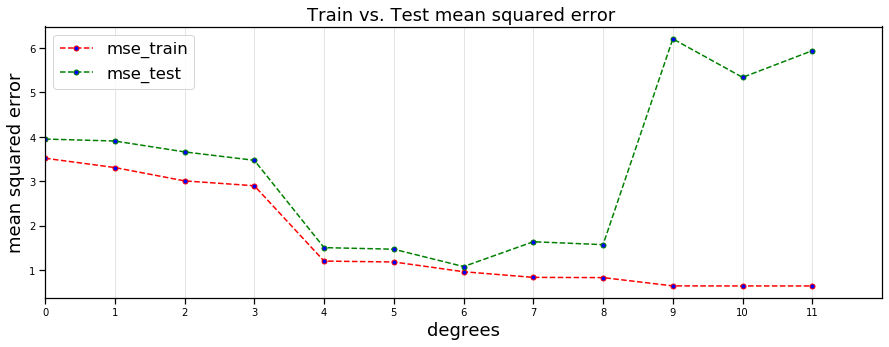

In [9]:
fig, ax = plt.subplots(figsize=(15,5))  
plt.plot(degree_list, mse_train, color='red', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=5,label='mse_train')

plt.plot(degree_list, mse_test, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=5,label='mse_test')

ax.set(xlabel='degrees', ylabel='mean squared error',
       title='Train vs. Test mean squared error ')

plt.xlim(0,12,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
locator = ticker.IndexLocator(base = 1, offset = 0)
ax.xaxis.set_major_locator(locator)
ax.grid(axis='x', color='grey', alpha=0.2);

#### Explain your results. 

Well, we see that the optimal degree for the Test set is 6 and  Train 11
<br>With this degree(which we see on the plot) we will have an optimal model

## Polynomial Regression - Regularization
Now, instead of choosing the best maximal degree to use, we will use polynomial regression with regularization. 

### Questions:
#### 4. Apply polynomial ridge regression with polynomial degree 11, using different regularization parameters (also test the case where the regularization parameter equals 0). For this task you should use L2-norm regularization (ridge regression), which uses the sum of squared parameters as the regularization term (as we saw in class). That is, 
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_2
$$
where $\alpha$ is the regularization parameter, $\boldsymbol\theta$ is the vector of coefficients including the intercept term and $\mathbf{x}_i$ is the vector of the predictors of the i-th data point including a constant predictor for the intercept. <br><b>**Hint:** Use *sklearn.linear_model.Ridge* with parameter *alpha=...*.</b>

>Again, plot the fitted polynomial against the training data and the underlying generating function. This time, also plot the coefficients of the fitted polynomial. 



/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.54882e-23): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63569e-23): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09861e-21): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40697e-21): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.92036e-21): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/s

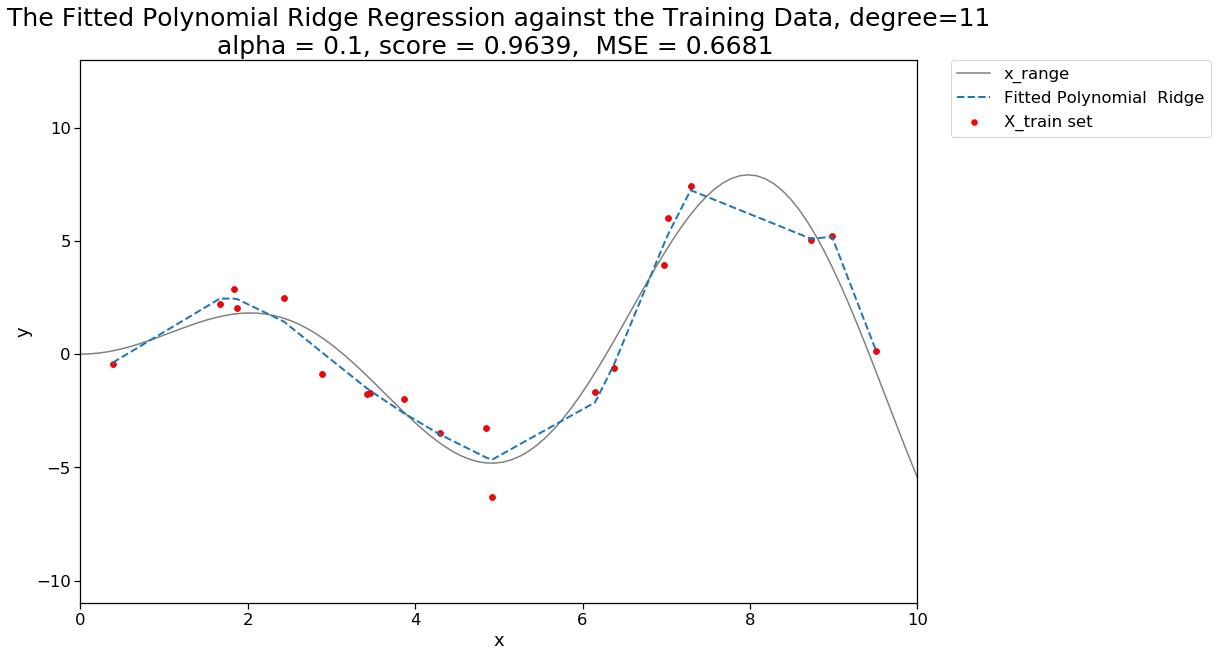

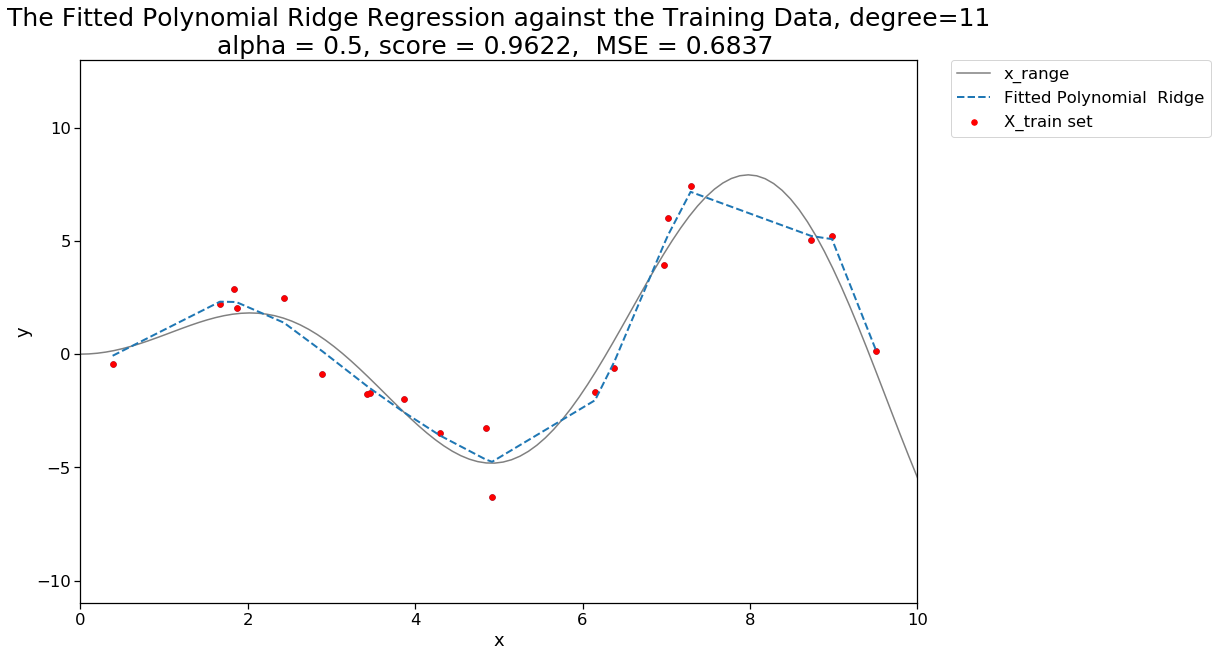

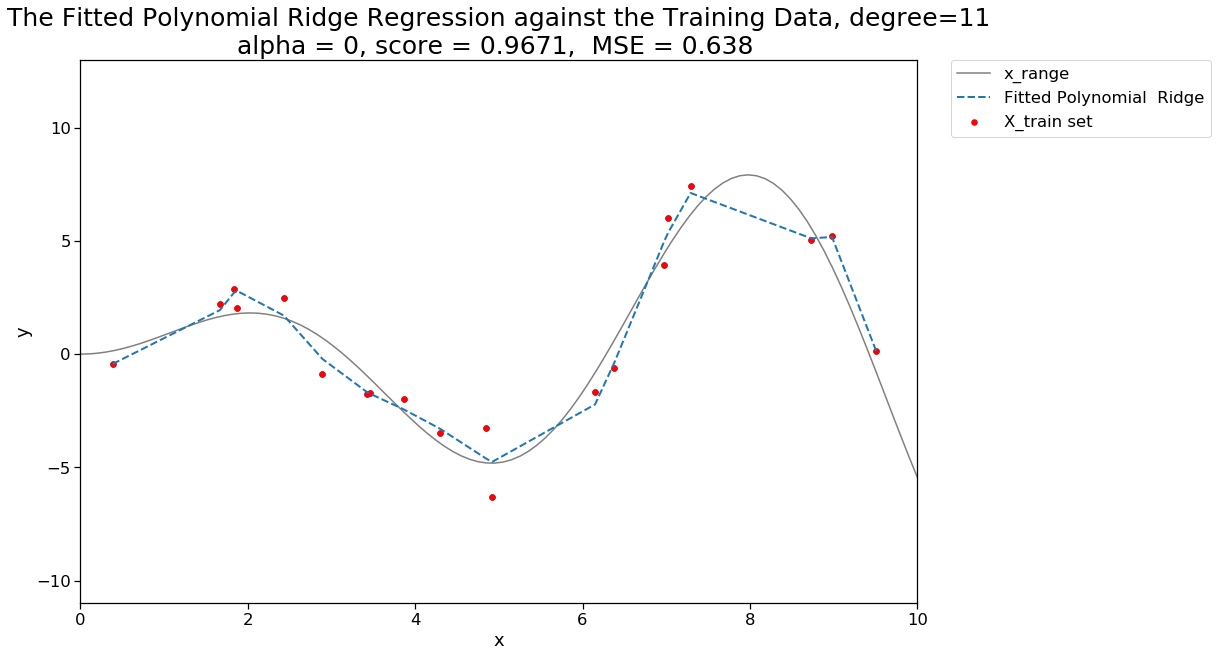

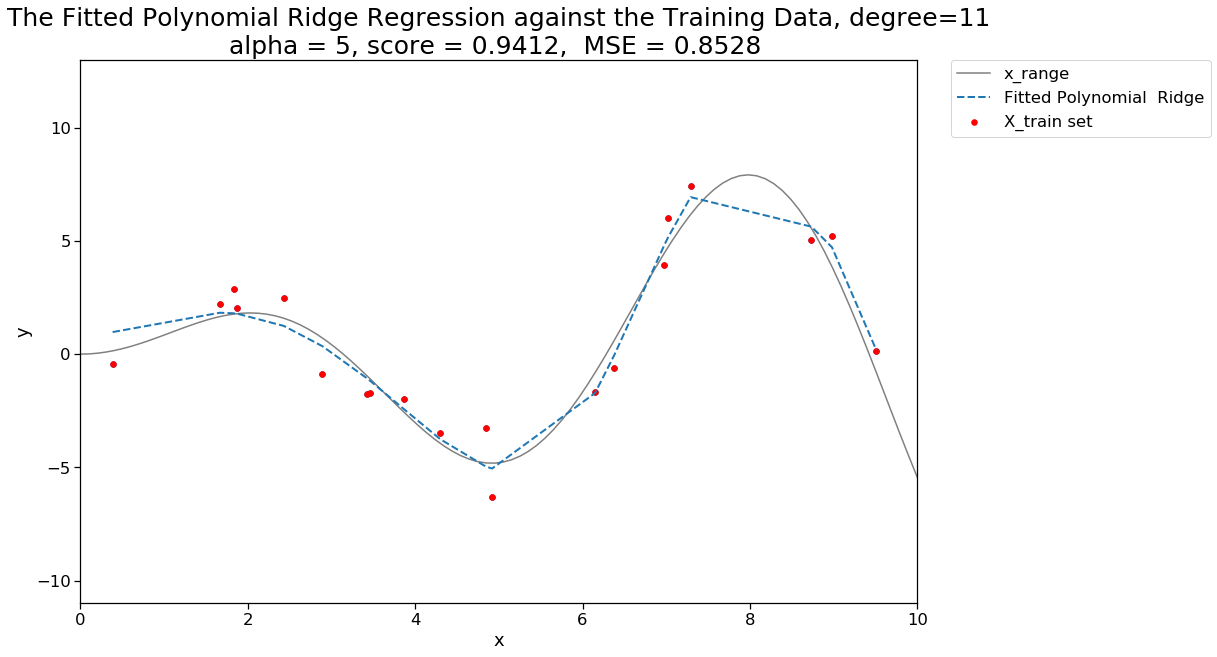

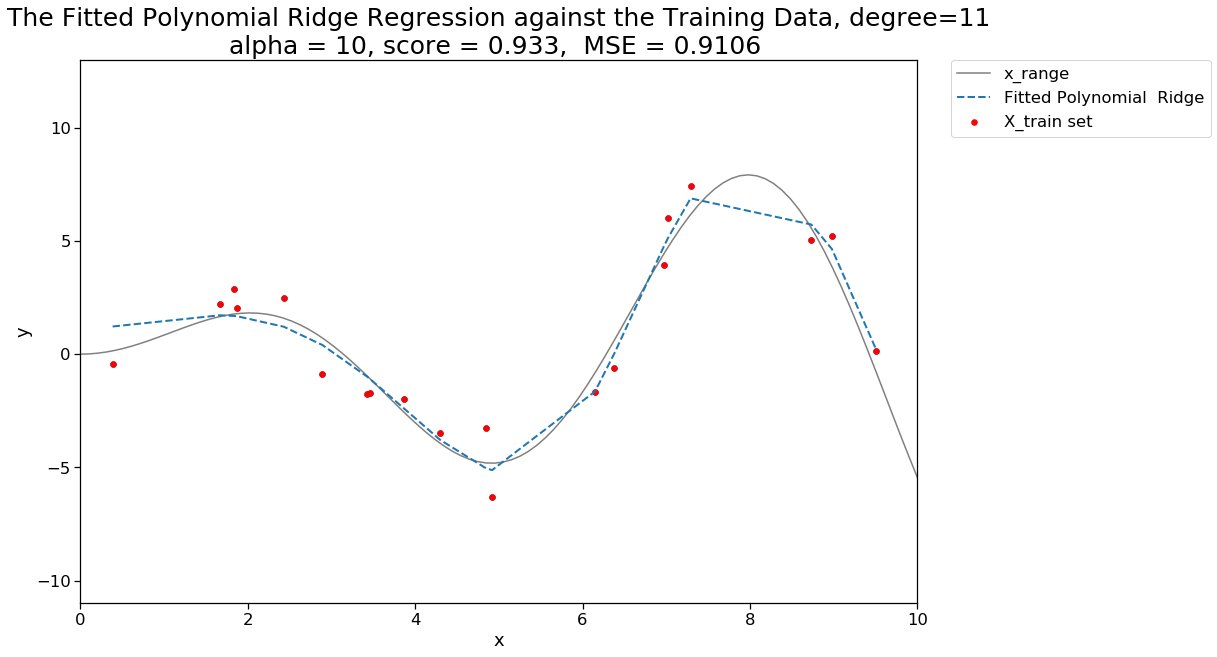

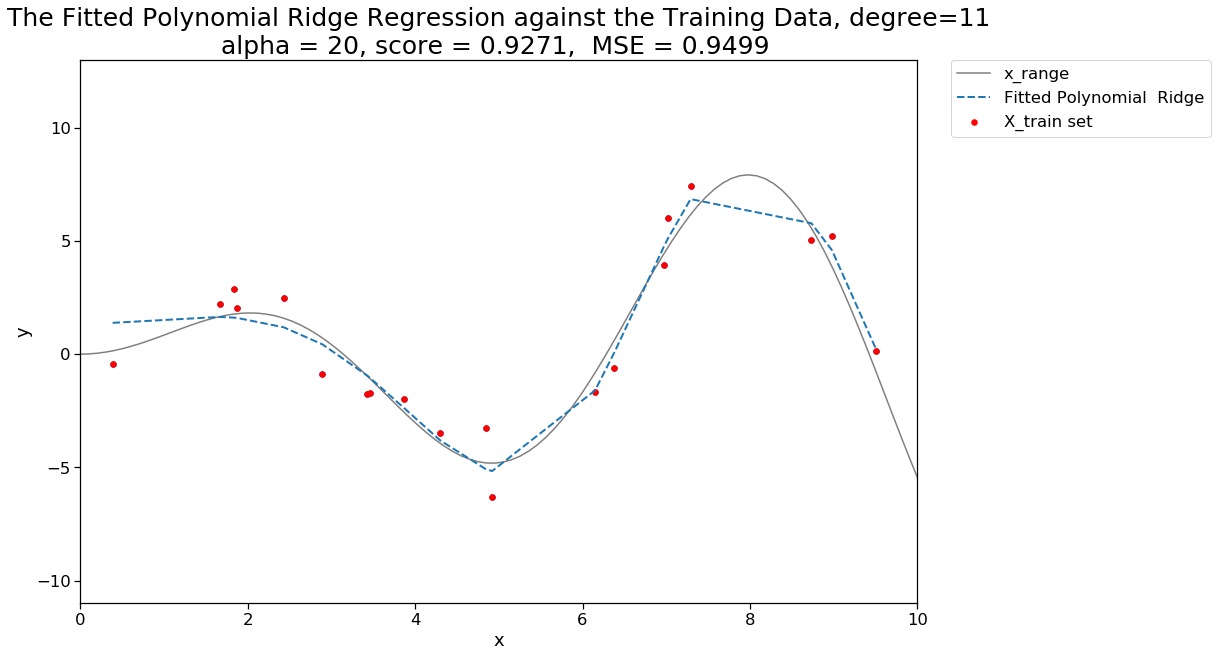

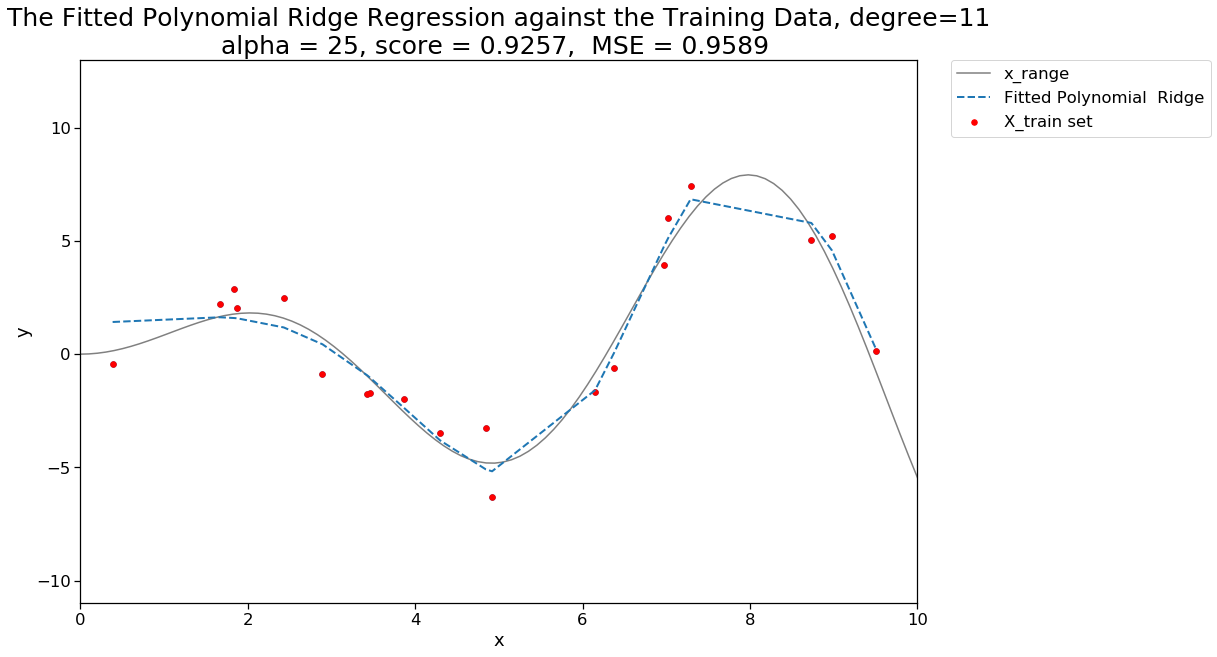

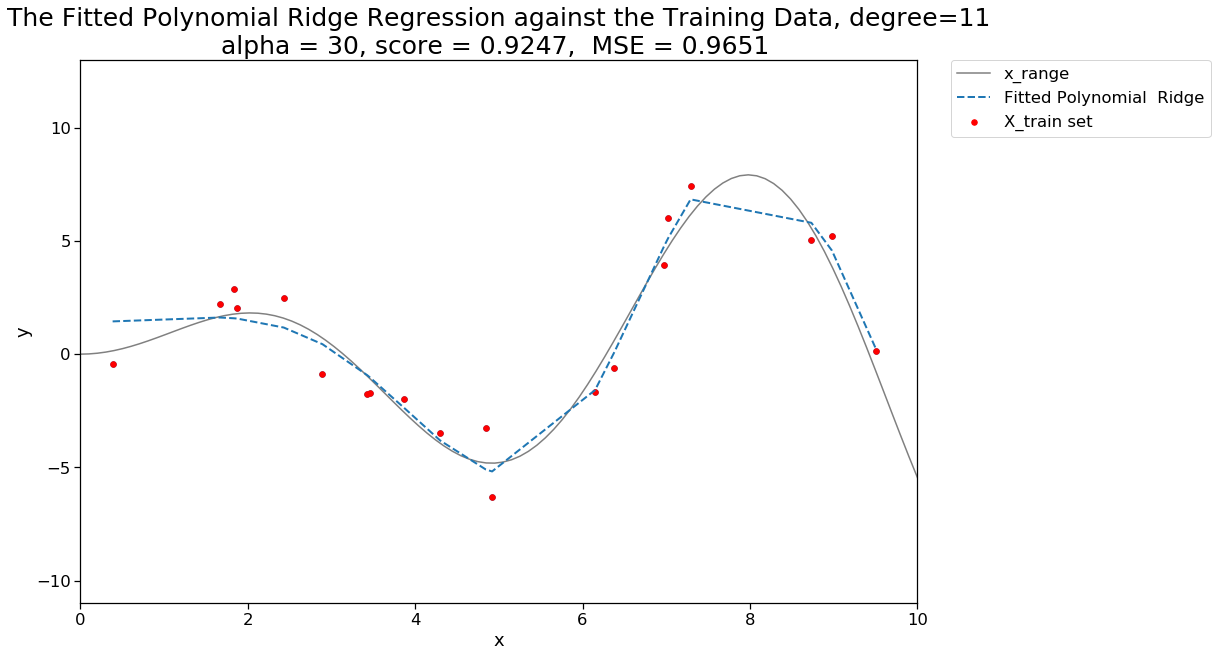

In [63]:
alphas = [0.1,0.5,0,5,10,20,25,30]

poly_features = PolynomialFeatures(degree=11)
X_train_poly = poly_features.fit_transform(X_train)


for i in alphas:
    ridg_model = Ridge(alpha=i)
    ridg_model.fit(X_train_poly, y_train)
    y_train_predict_ridge = ridg_model.predict(X_train_poly)
    
    #calculating accurasy and mse
    train_score = ridg_model.score(X_train_poly, y_train)
    train_mse = mean_squared_error(y_train, y_train_predict_ridge)
    
    #Plot the fitted polynomial against the training data
    idxs = X_train.flatten().argsort()
    y_train_predict_ridge = y_train_predict_ridge[idxs]
    plt.figure(figsize = (15,10))
    plot_fit(plt.gca(), X_train, y_train)
    plt.scatter(X_train,y_train,color='red',s=30,label='X_train set')
    plt.plot(X_train[idxs], \
             y_train_predict_ridge,linestyle='--',label='Fitted Polynomial  Ridge', linewidth=2)
    
    plt.title(f'The Fitted Polynomial Ridge Regression against the Training Data, degree=11\nalpha = {str(i)}, score = {round(train_score, 4)},  MSE = {round(np.sqrt(train_mse),4)} ', fontsize=25)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0.);
        

/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.61758e-24): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.80879e-23): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.80879e-22): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.61758e-22): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.23516e-22): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/s

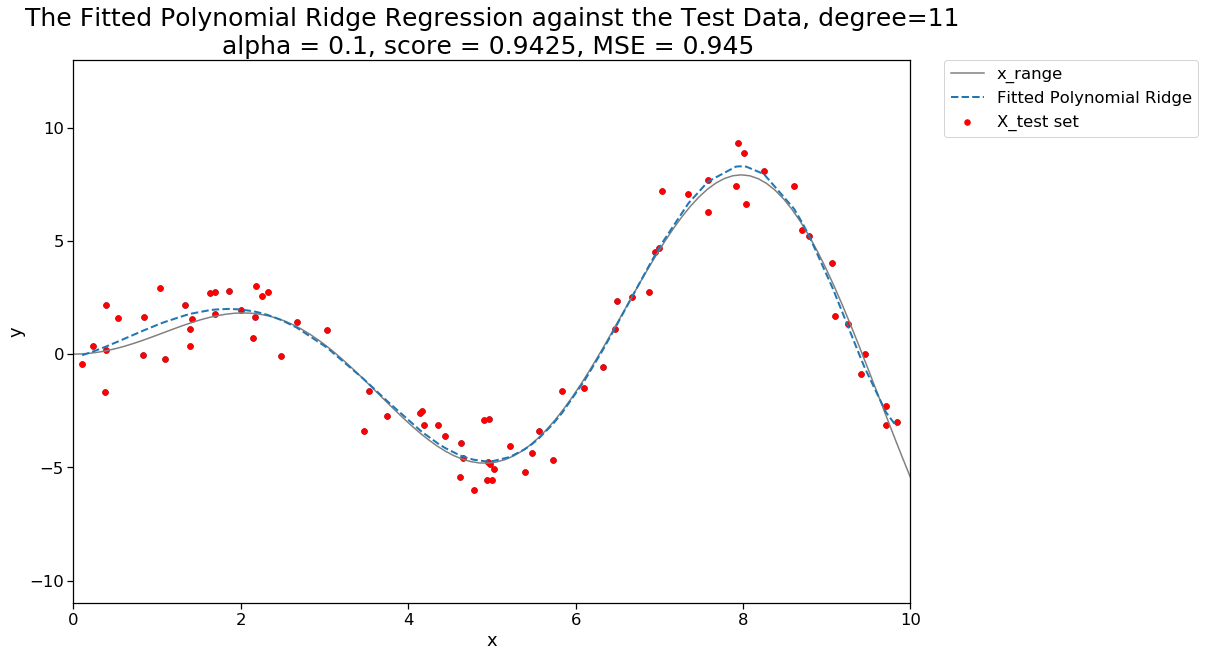

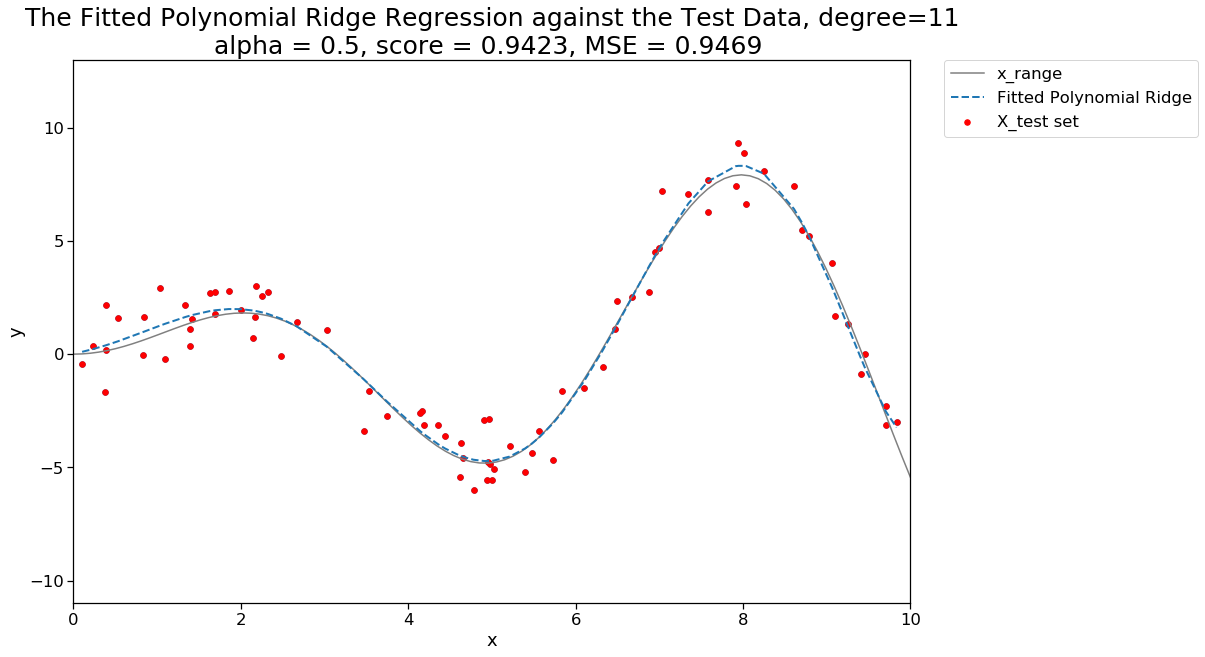

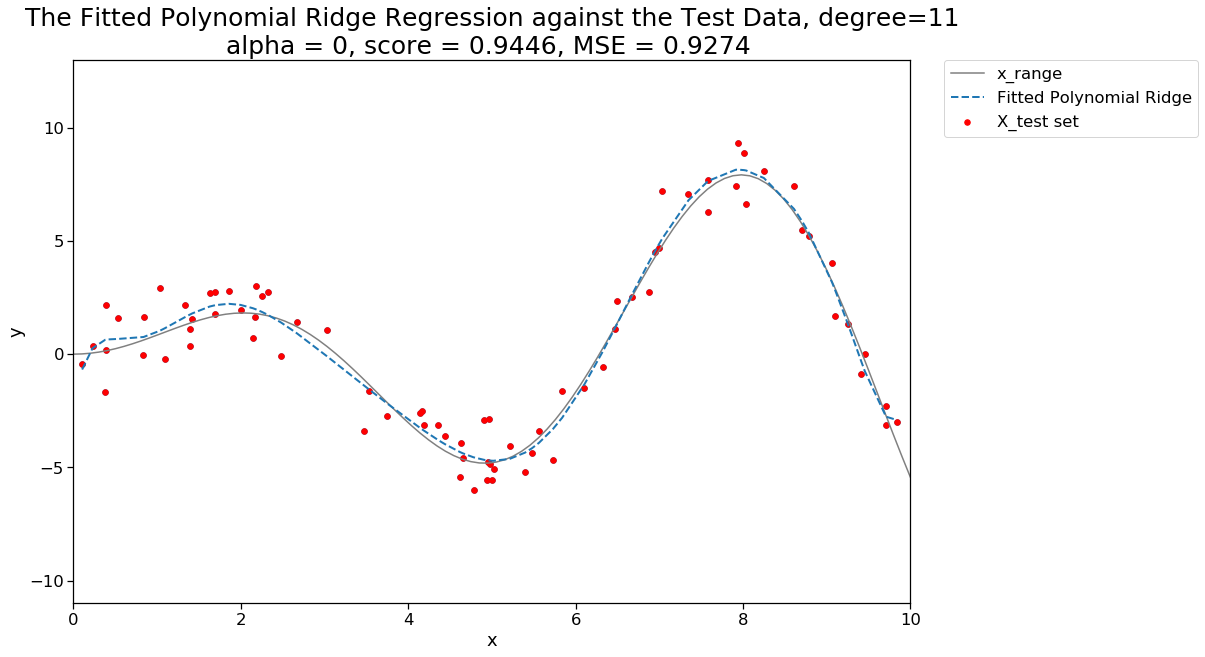

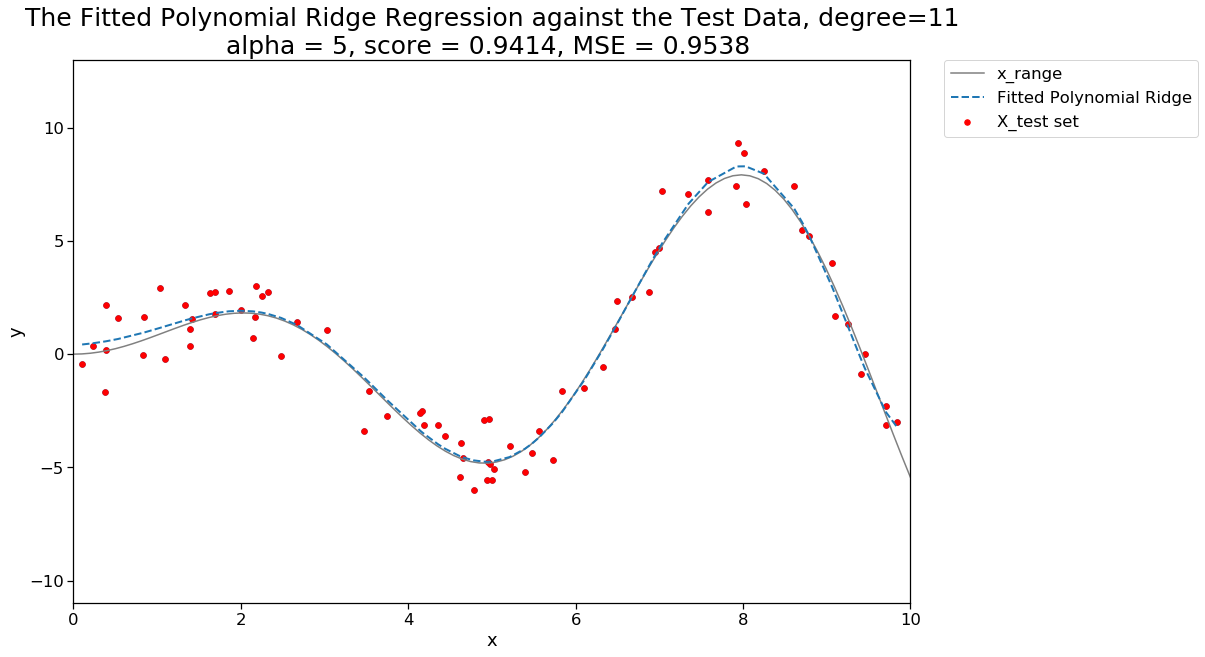

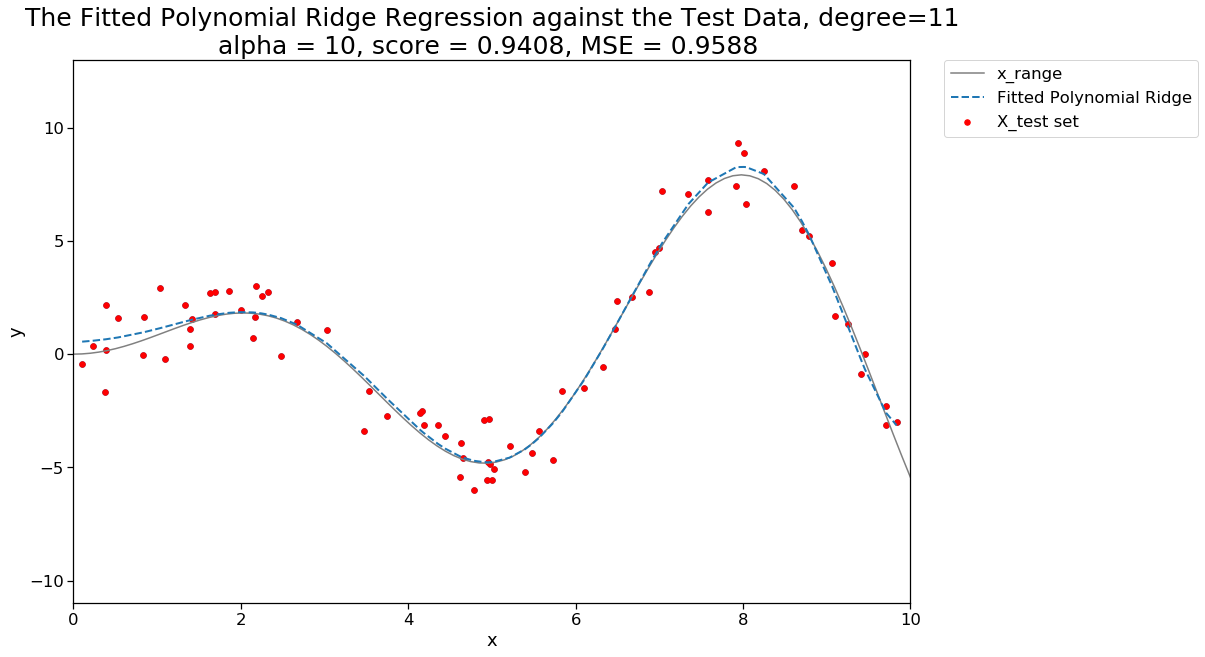

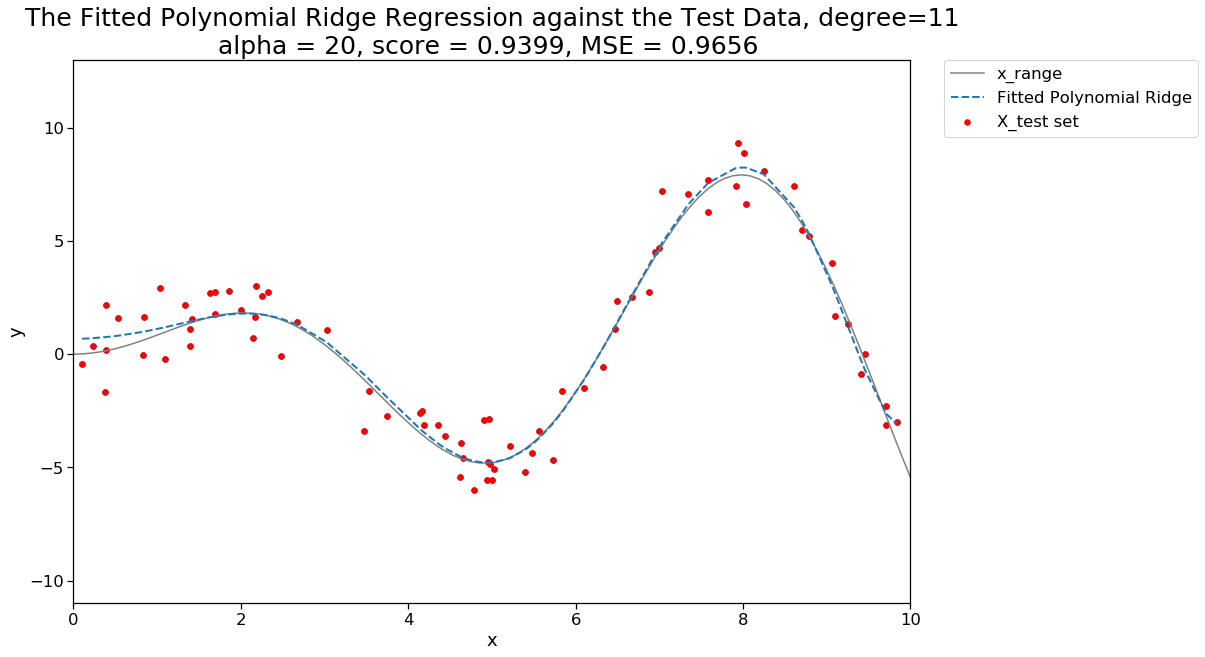

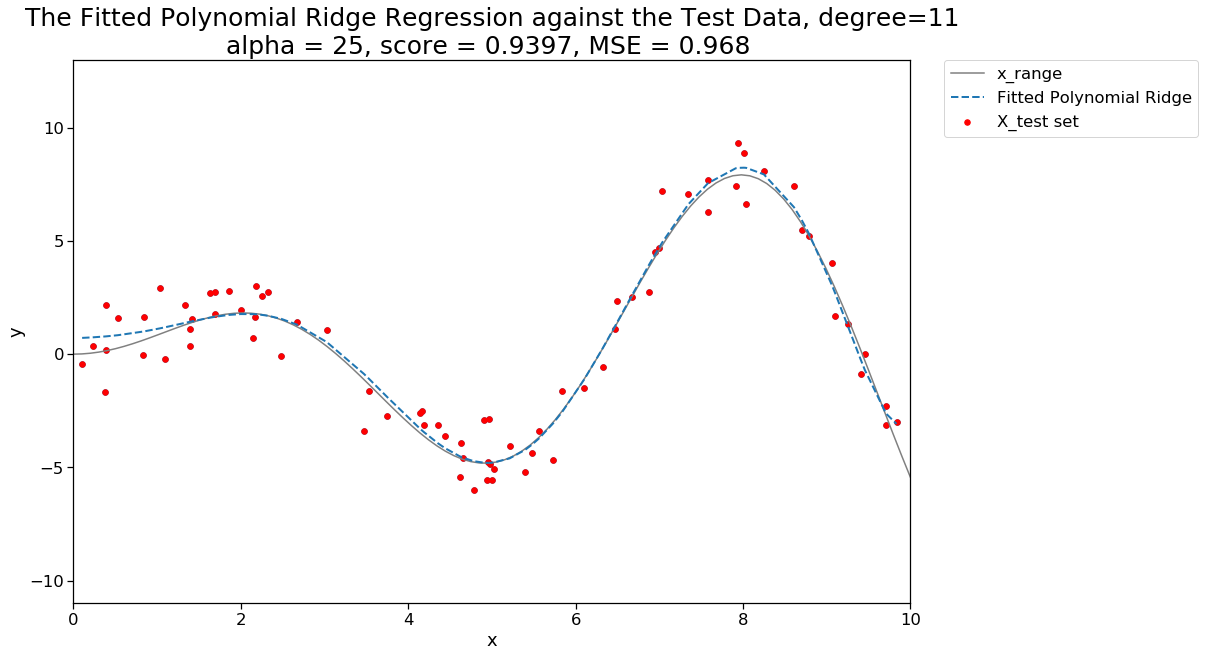

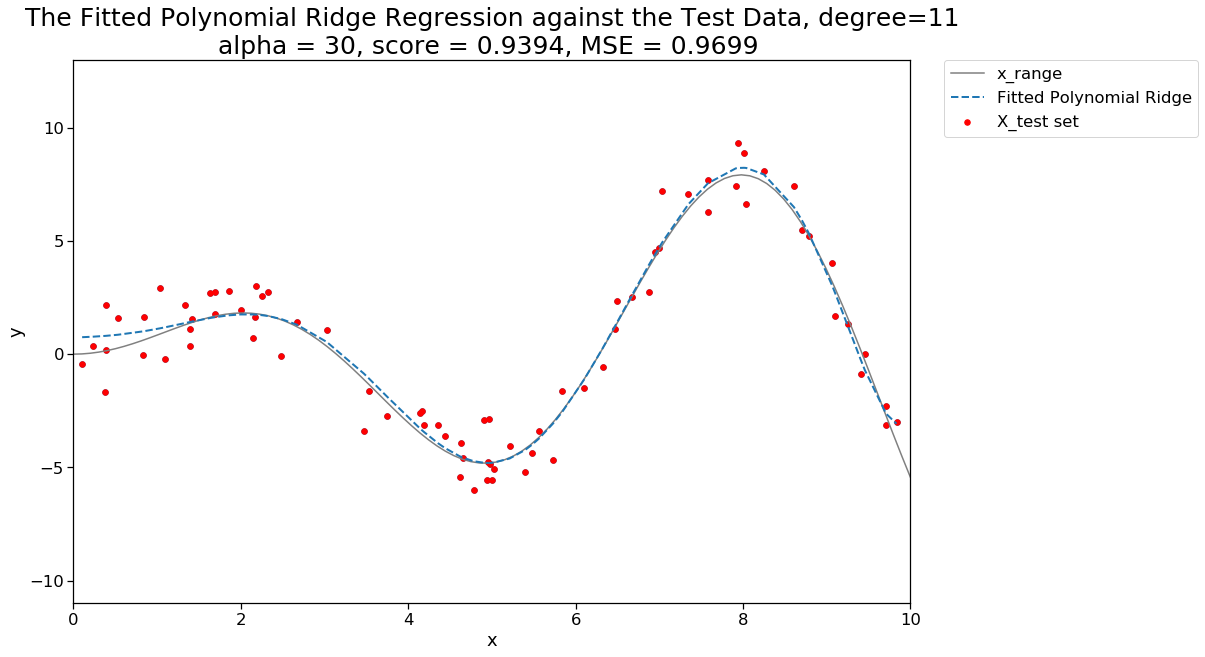

In [67]:


for i in alphas:
    ridg_model = Ridge(alpha=i)
    ridg_model.fit(X_test_poly, y_test)
    y_test_pred_ridge = ridg_model.predict(X_test_poly)
    #calculating accurasy and mse
    test_score = ridg_model.score(X_test_poly, y_test)
    test_mse = mean_squared_error(y_test, y_test_pred_ridge)
    
    #Plot the fitted polynomial against the training data
    idxs = X_test.flatten().argsort()
    y_test_pred_ridge = y_test_pred_ridge[idxs]
    plt.figure(figsize = (15,10))
    plot_fit(plt.gca(), X_test, y_test)
    plt.scatter(X_test,y_test,color='red',s=30,label='X_test set')
    plt.plot(X_test[idxs], \
             y_test_pred_ridge,linestyle='--', linewidth=2,label='Fitted Polynomial Ridge')
    
    plt.title(f'The Fitted Polynomial Ridge Regression against the Test Data, degree=11\nalpha = {str(i)}, score = {round(test_score, 4)}, MSE = {round(np.sqrt(test_mse),4)} ',fontsize=25)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0.);
        

Let's look on the plot with distribution of coeff for Train and Test sets

/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.54882e-23): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.63569e-23): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09861e-21): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40697e-21): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.92036e-21): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/s

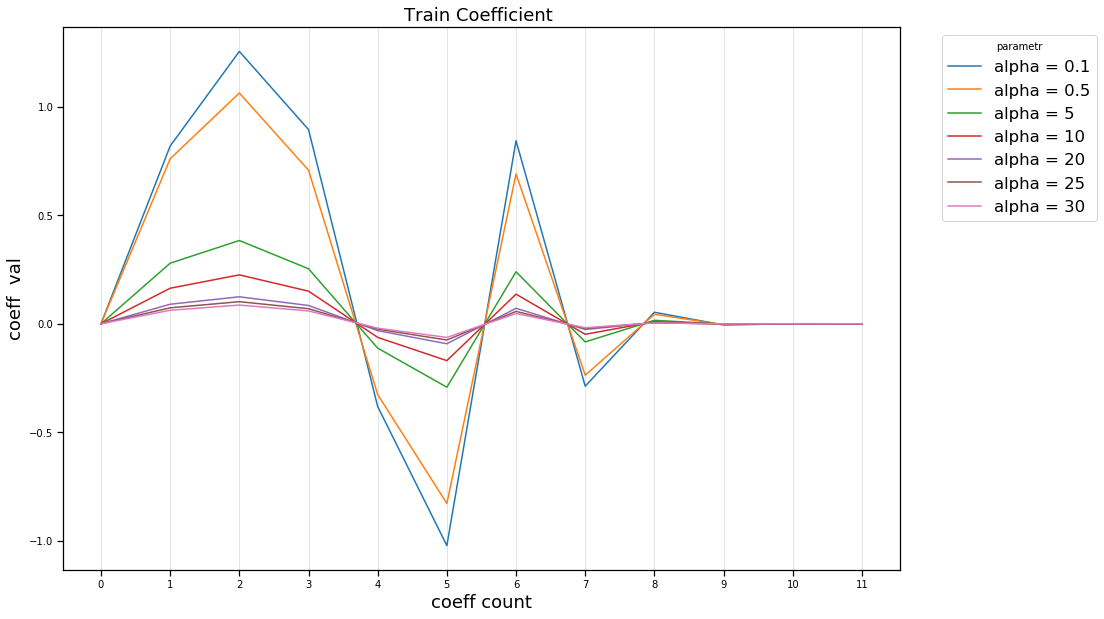

In [12]:
fig, ax = plt.subplots(figsize=(15,10))  
alphas = [0.1,0.5,5,10,20,25,30]

for i in alphas:
    ridge = Ridge(alpha=i).fit(X_train_poly, y_train)
    plt.plot(range(len(ridge.coef_.flatten())),ridge.coef_.flatten().copy(),label=f'alpha = {str(i)}')
    
ax.set(xlabel='coeff count', ylabel='coeff  val',
title='Train Coefficient ')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title = 'parametr', bbox_to_anchor=(1.04, 1),loc='upper left')
locator = ticker.IndexLocator(base = 1, offset = 0)
ax.xaxis.set_major_locator(locator)
ax.grid(axis='x', color='grey', alpha=0.2);


/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.61758e-24): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.80879e-23): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.80879e-22): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.61758e-22): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.23516e-22): result may not be accurate.
  overwrite_a=True).T
/home/gal/anaconda3/lib/python3.6/s

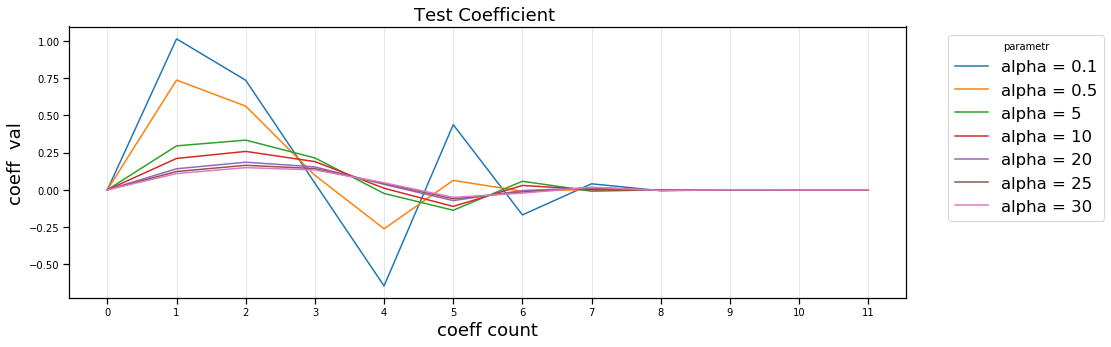

In [13]:
fig, ax = plt.subplots(figsize=(15,5))  
alphas = [0.1,0.5,5,10,20,25,30]

for i in alphas:
    ridge = Ridge(alpha=i).fit(X_test_poly, y_test)
    plt.plot(range(len(ridge.coef_.flatten())),ridge.coef_.flatten().copy(),label=f'alpha = {str(i)}')
    
ax.set(xlabel='coeff count', ylabel='coeff  val',
title='Test Coefficient ')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title = 'parametr', bbox_to_anchor=(1.04, 1),loc='upper left')
locator = ticker.IndexLocator(base = 1, offset = 0)
ax.xaxis.set_major_locator(locator)
ax.grid(axis='x', color='grey', alpha=0.2);


#### 5. What is the effect of applying regularization to the regression model, with different regularization parameters?

When λ = 0, the penalty term has no eﬀect, and the estimates produced by ridge regression will be equal to least squares. However, as λ→∞, the impact of the shrinkage penalty grows, and the ridge regression coeﬃcient estimates will approach zero. As can be seen, selecting a good value of λ is critical.


#### What would be the best regularization parameter to use in this case? 

alpha = 25 or 30 is very good for our model

#### Compare your results with the model selection approach for overcoming the the problem of overfitting.


The increase in flexibility of a model is represented by increase in its coefficients, and if we want to minimize the above function, then these coefficients need to be small. This is how the Ridge regression technique prevents coefficients from rising too high and therefore no overfitting, which we had in a previous question with degree = 11.


#### 6. Compare the above results with L1-norm regularization (LASSO) instead of the L2-norm, that is
$$
L(\boldsymbol\theta) = \frac{1}{n}\sum_{i=0}^n (y_i – \boldsymbol\theta^T \mathbf{x}_i)^2 + \alpha \|\boldsymbol\theta\|_1
$$
> **Hint**: Use *sklearn.linear_model.Lasso*.

/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.45193436777493, tolerance: 0.02474273826640057
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.78266962833003, tolerance: 0.02474273826640057
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  p

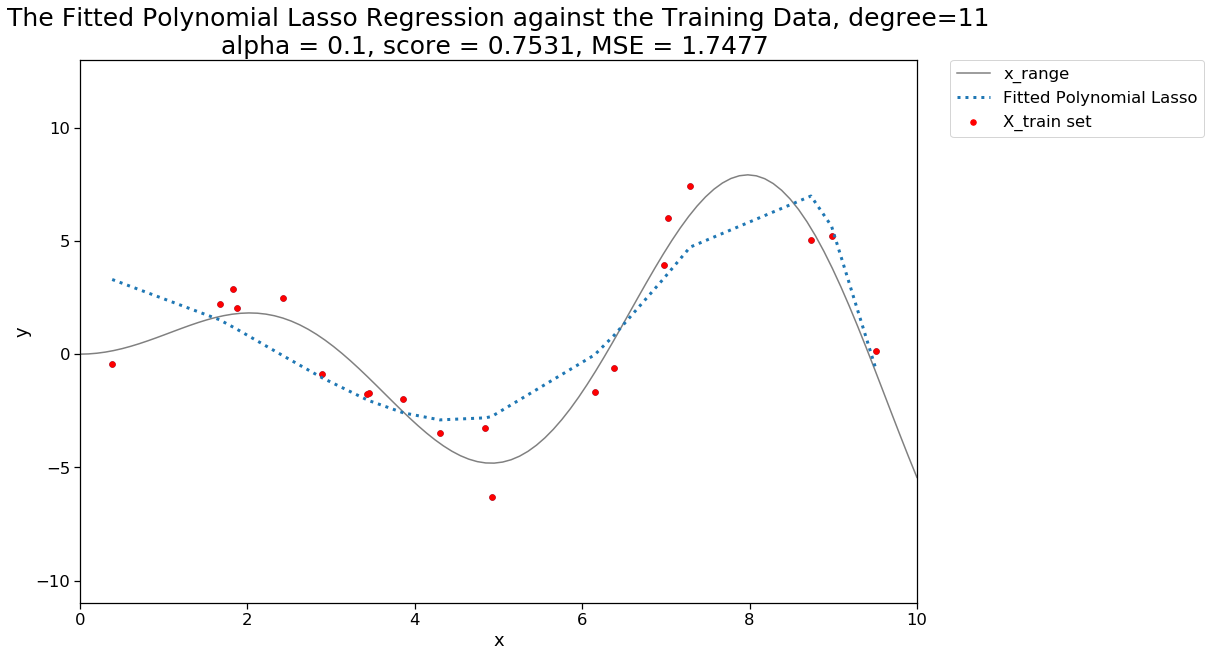

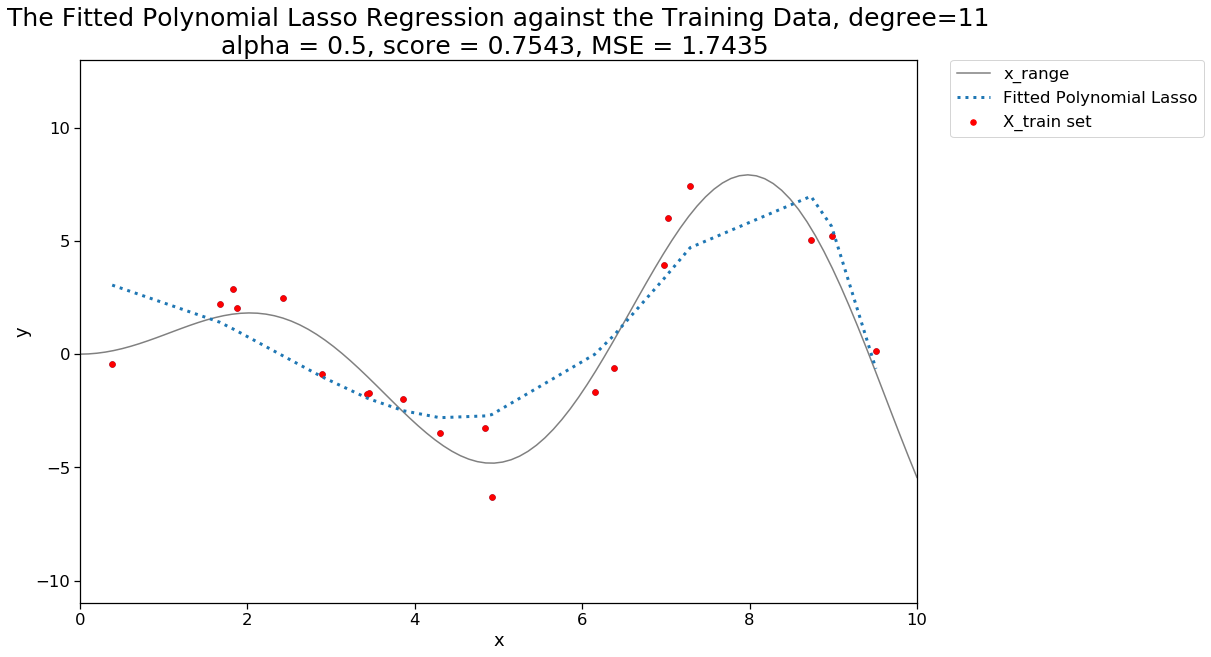

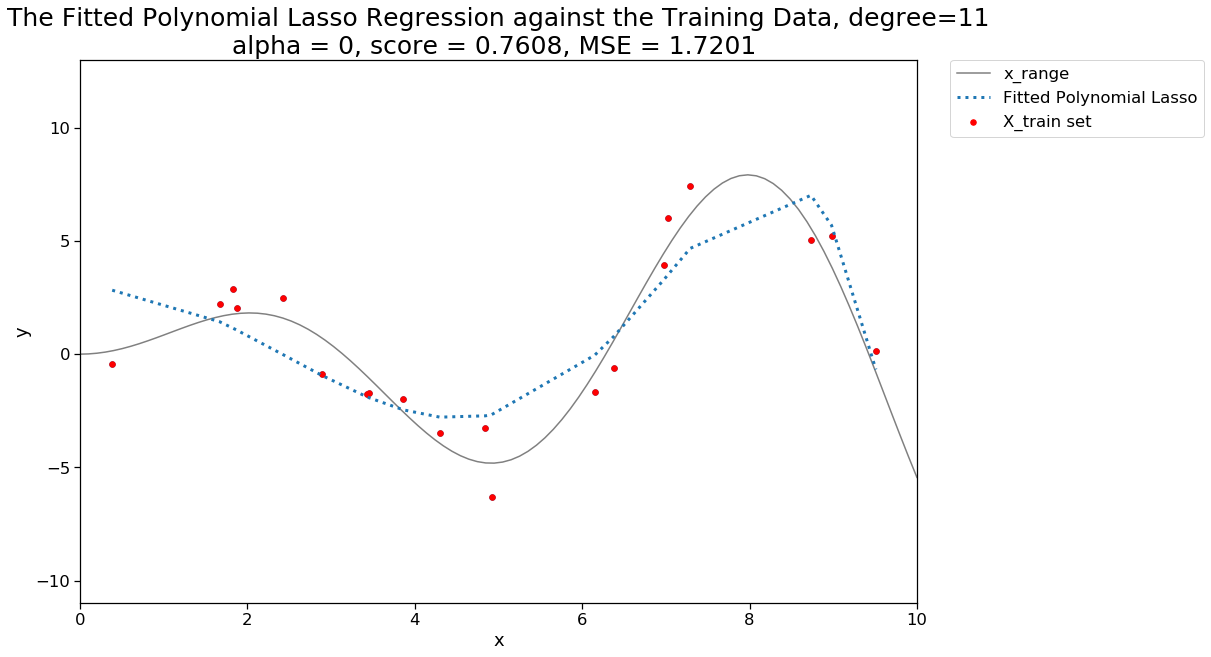

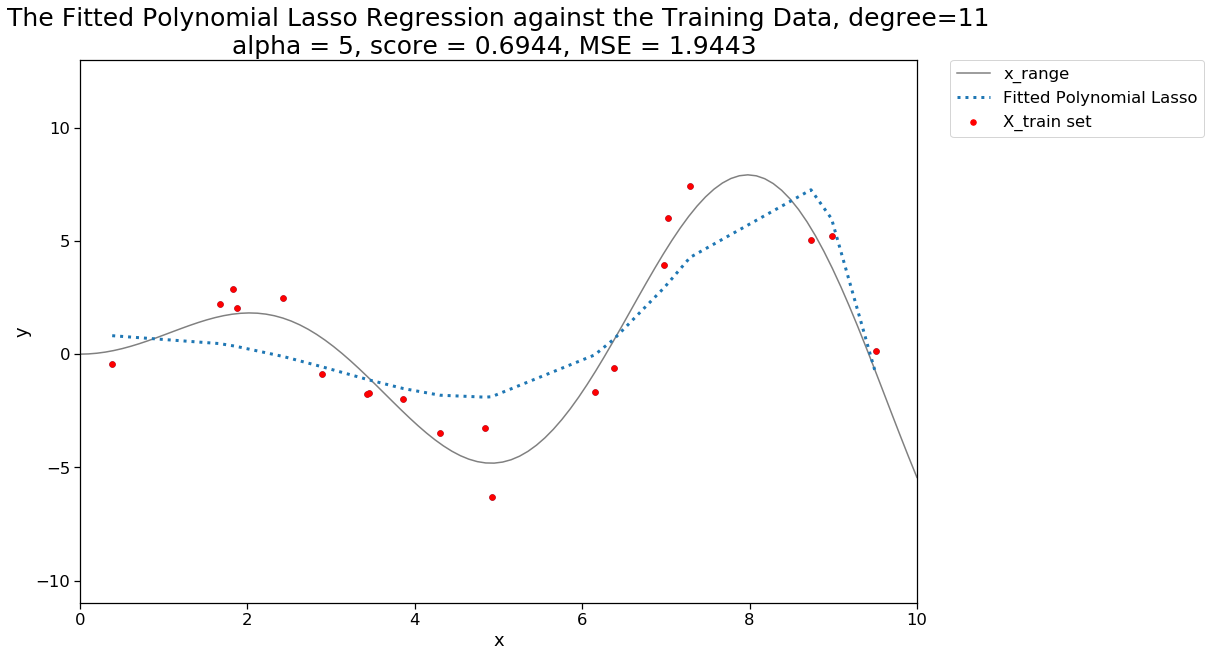

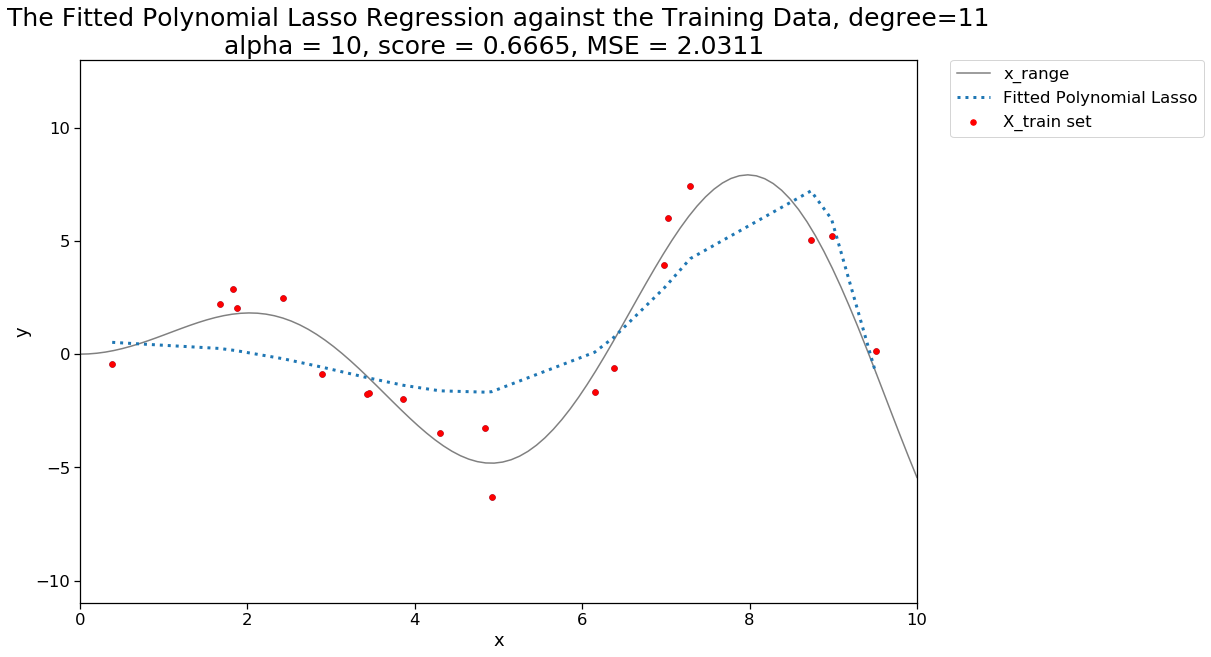

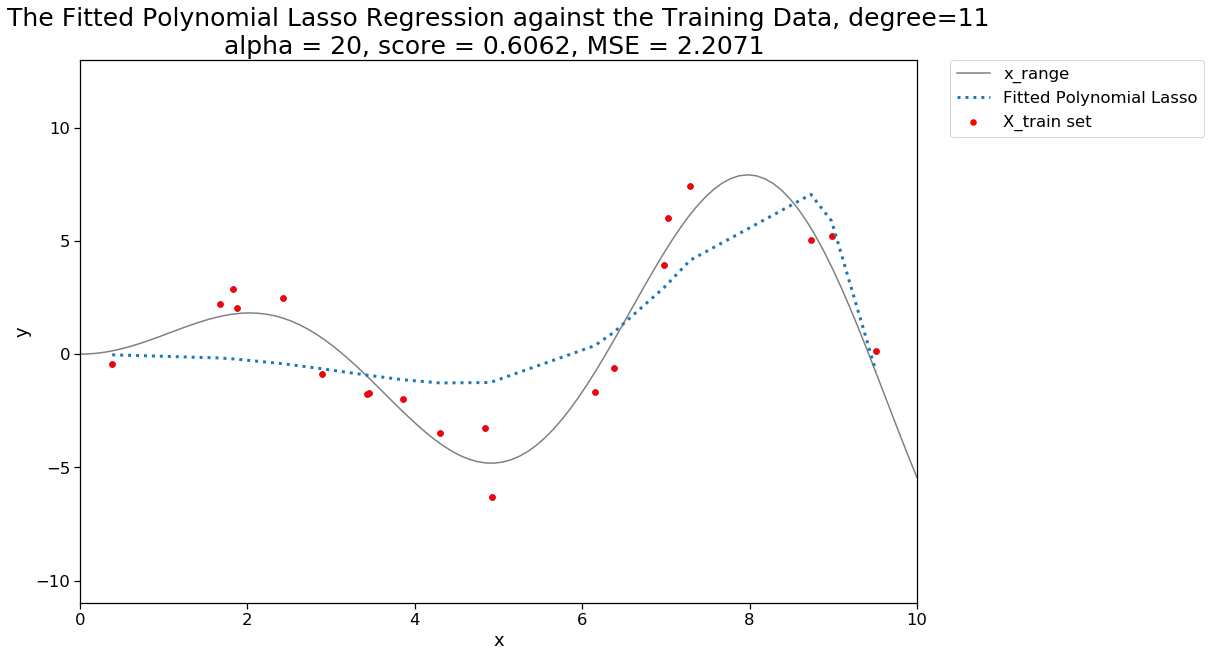

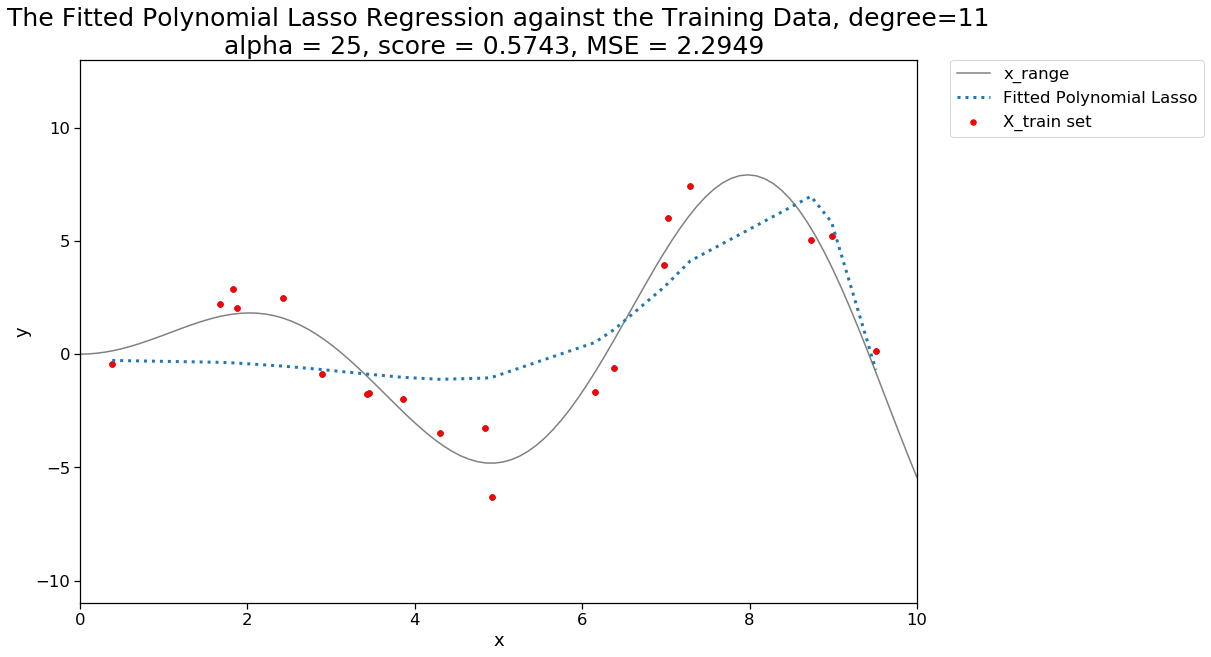

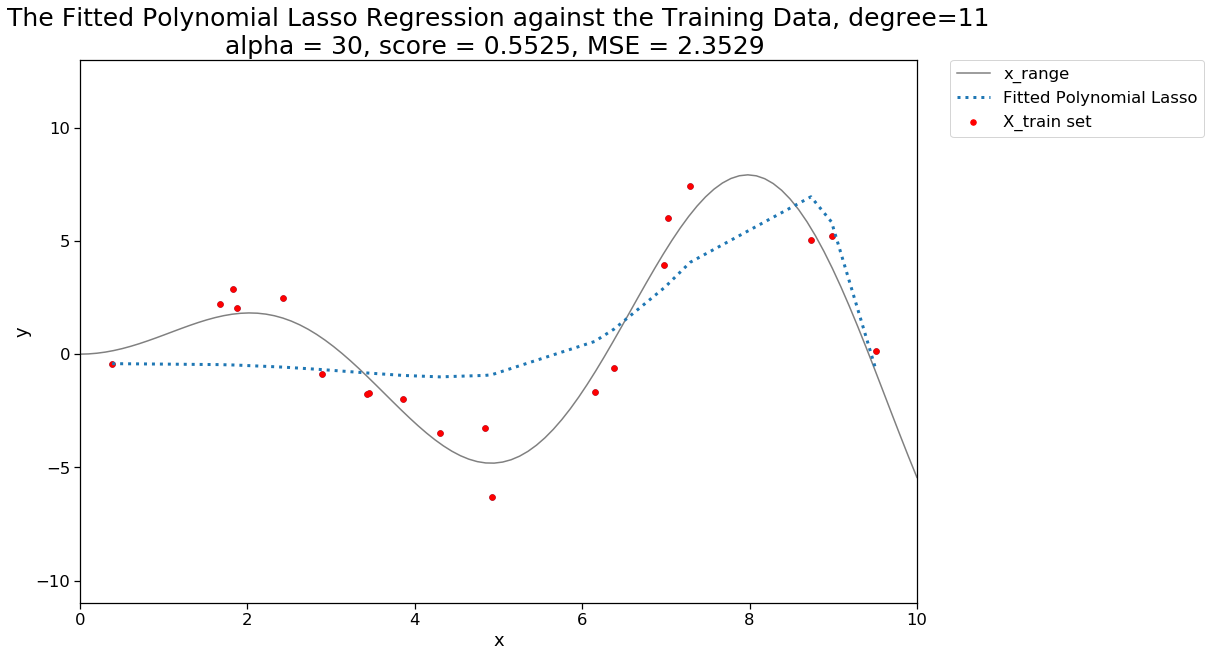

In [70]:
alphas = [0.1,0.5,0,5,10,20,25,30]

poly_features = PolynomialFeatures(degree=11)
X_train_poly = poly_features.fit_transform(X_train)



for i in alphas:
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train_poly, y_train)
    y_train_predict_lasso = lasso_model.predict(X_train_poly)
    
    #calculating accurasy and mse
    train_score = lasso_model.score(X_train_poly, y_train)
    train_mse = mean_squared_error(y_train, y_train_predict_lasso)
    
    #Plot the fitted polynomial against the training data
    idxs = X_train.flatten().argsort()
    y_train_predict_lasso = y_train_predict_lasso[idxs]
    plt.figure(figsize = (15,10))
    plot_fit(plt.gca(), X_train, y_train)
    plt.scatter(X_train,y_train,color='red',s=30,label='X_train set')
    plt.plot(X_train[idxs], \
             y_train_predict_lasso,linestyle=':', \
             label='Fitted Polynomial Lasso', linewidth=3)
    plt.title(f'The Fitted Polynomial Lasso Regression against the Training Data, degree=11\nalpha = {str(i)}, score = {round(train_score, 4)}, MSE = {round(np.sqrt(train_mse),4)} ',fontsize=25)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0.);
        

/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.57496744392483, tolerance: 0.1242193956332066
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.79268331404182, tolerance: 0.1242193956332066
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/gal/anaconda3/lib/python3.6/site-pack

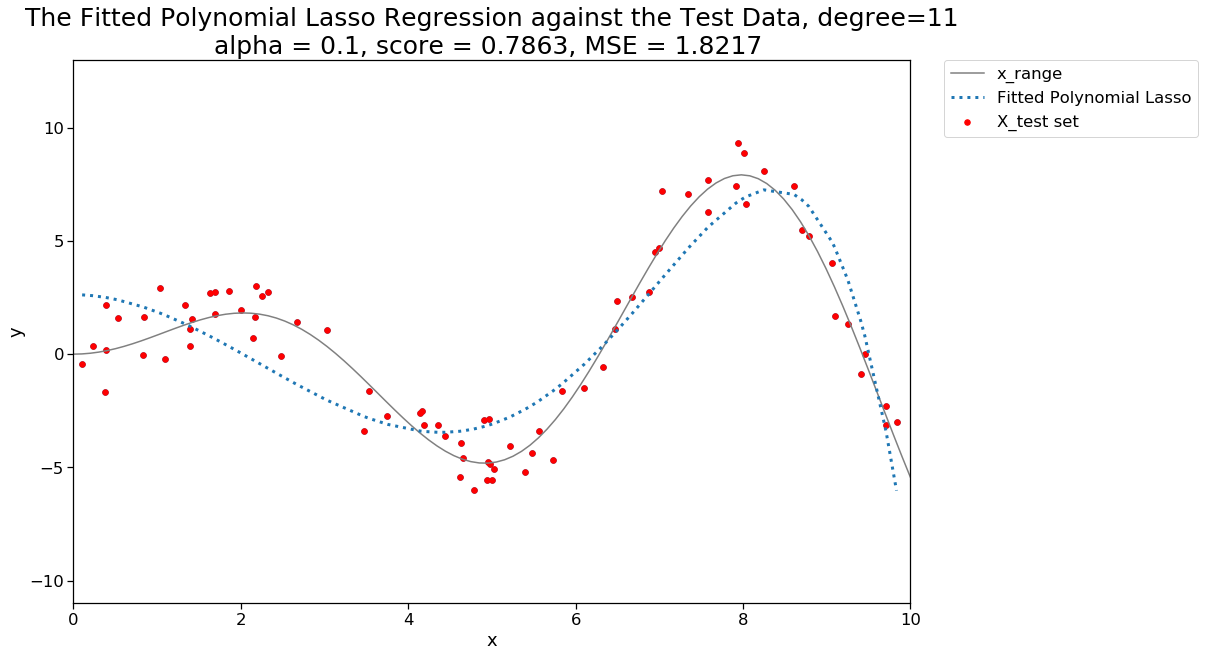

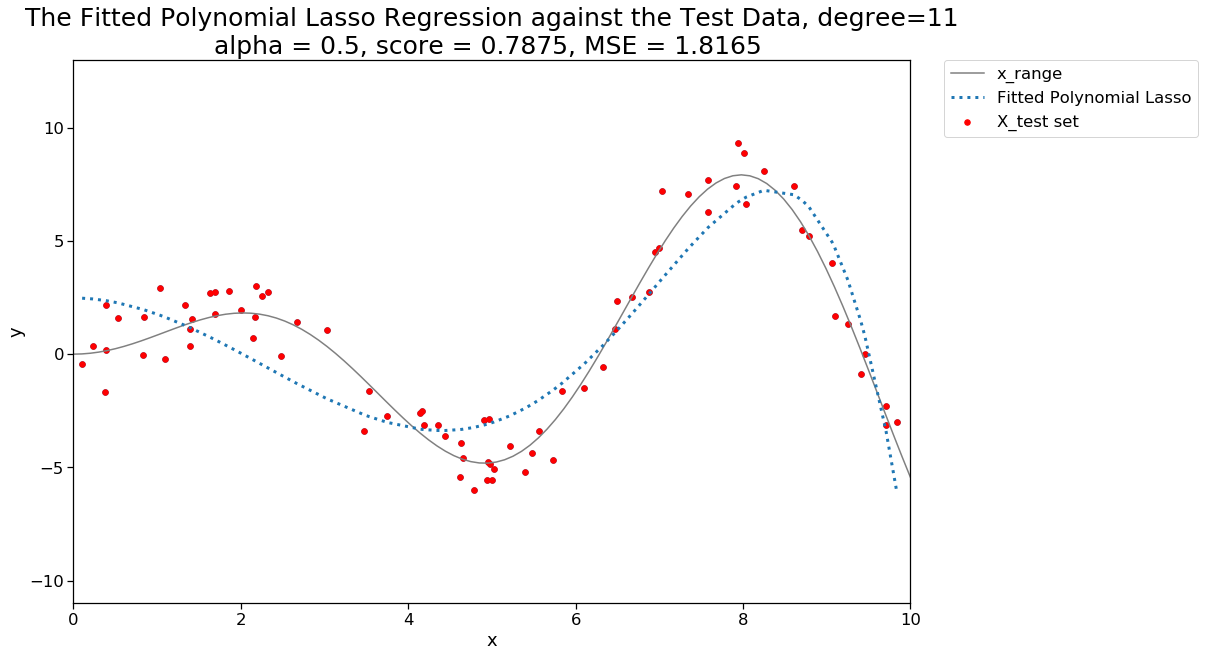

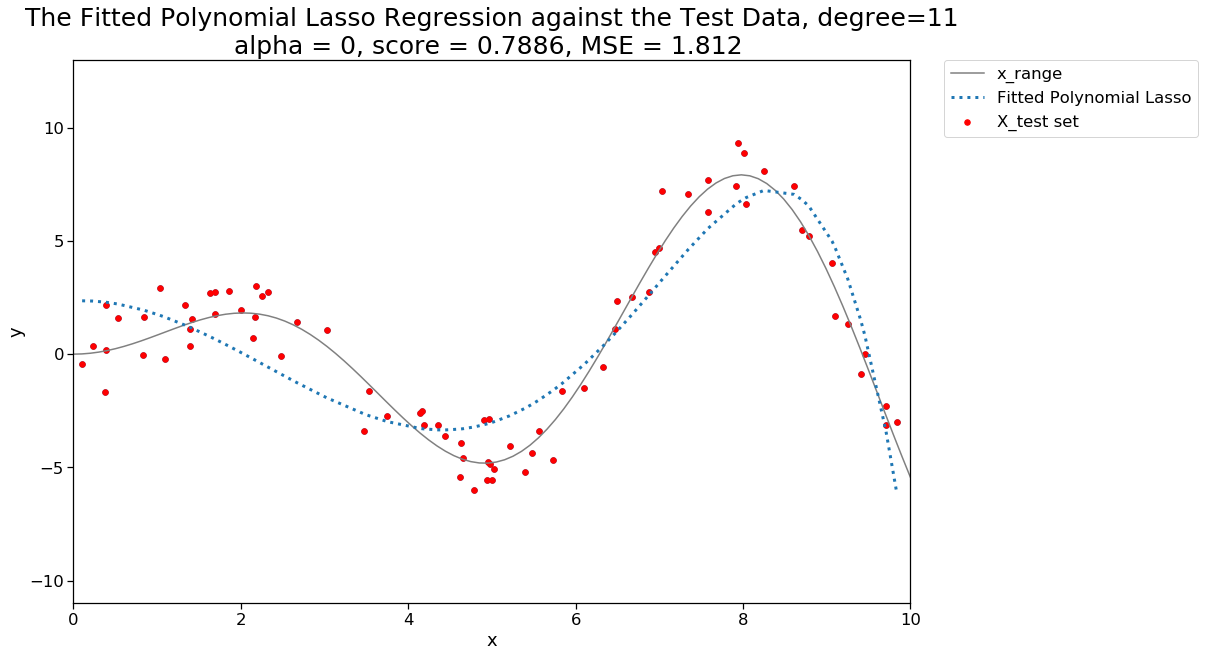

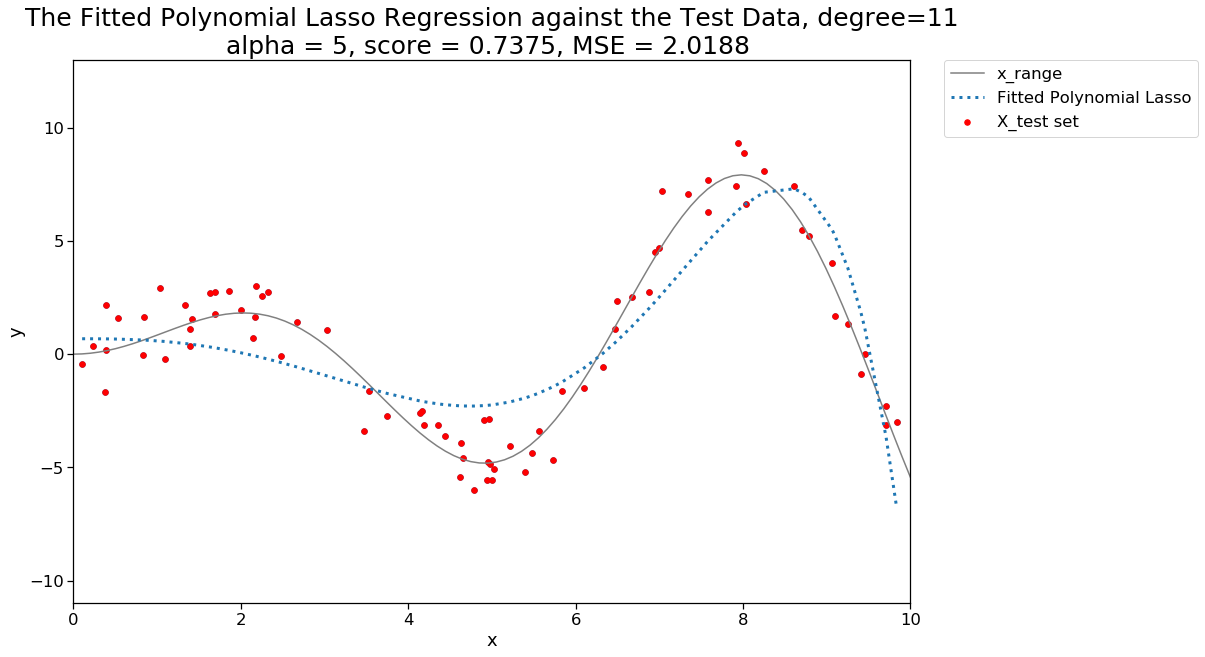

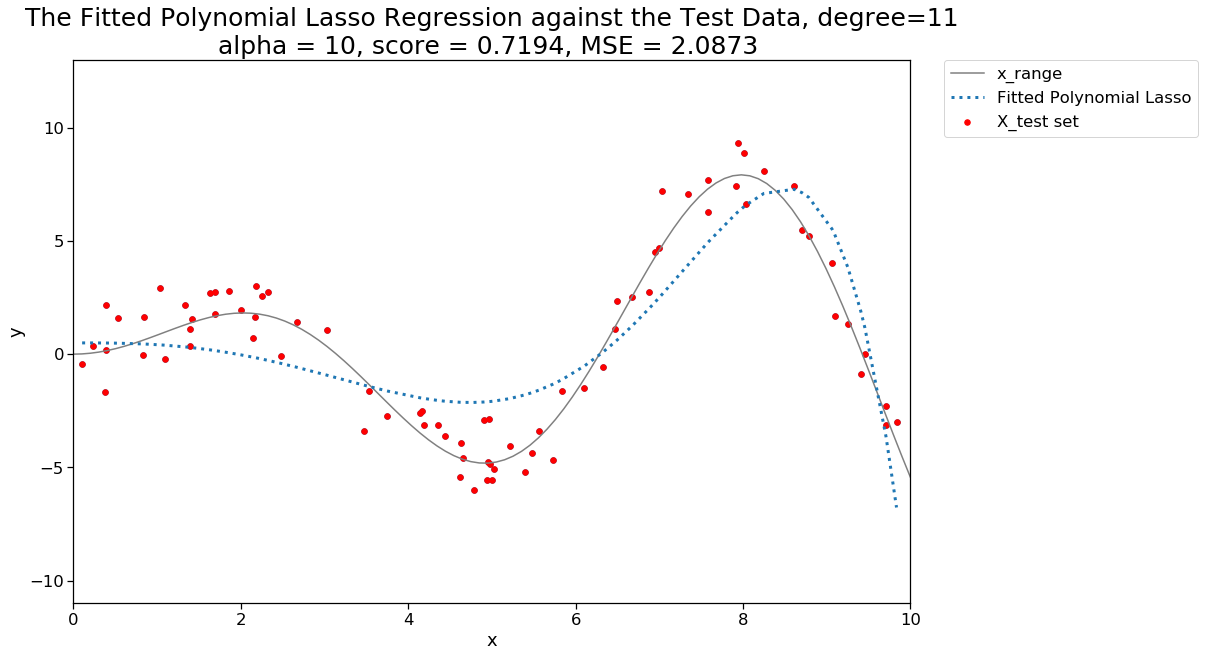

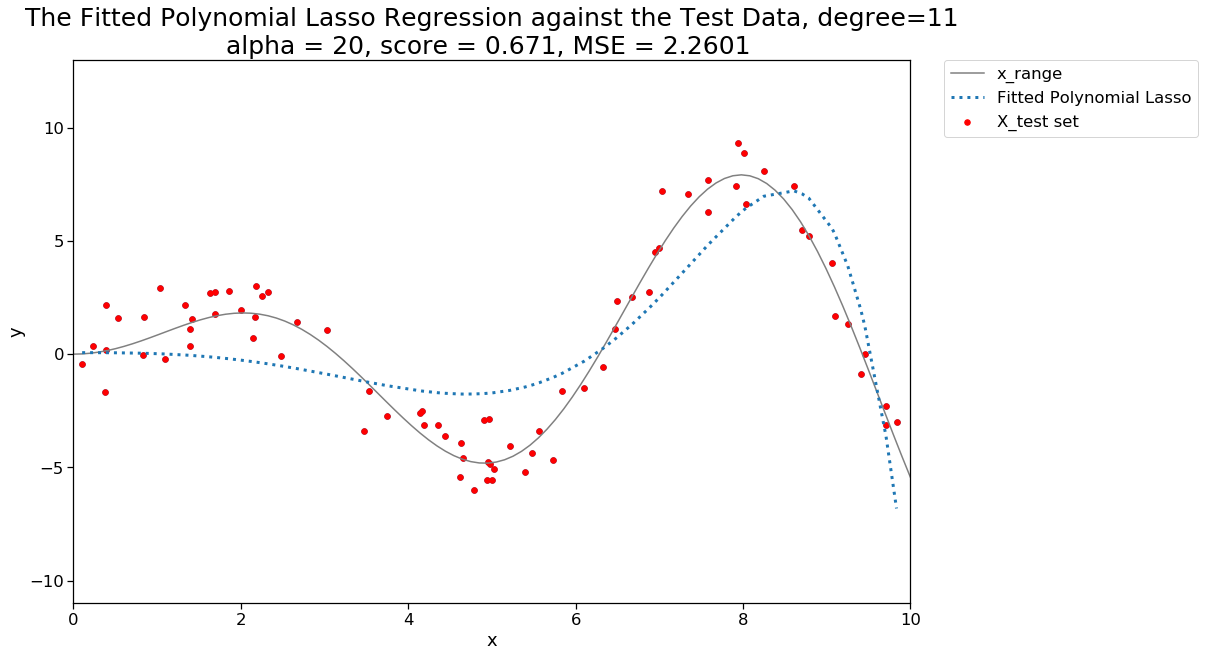

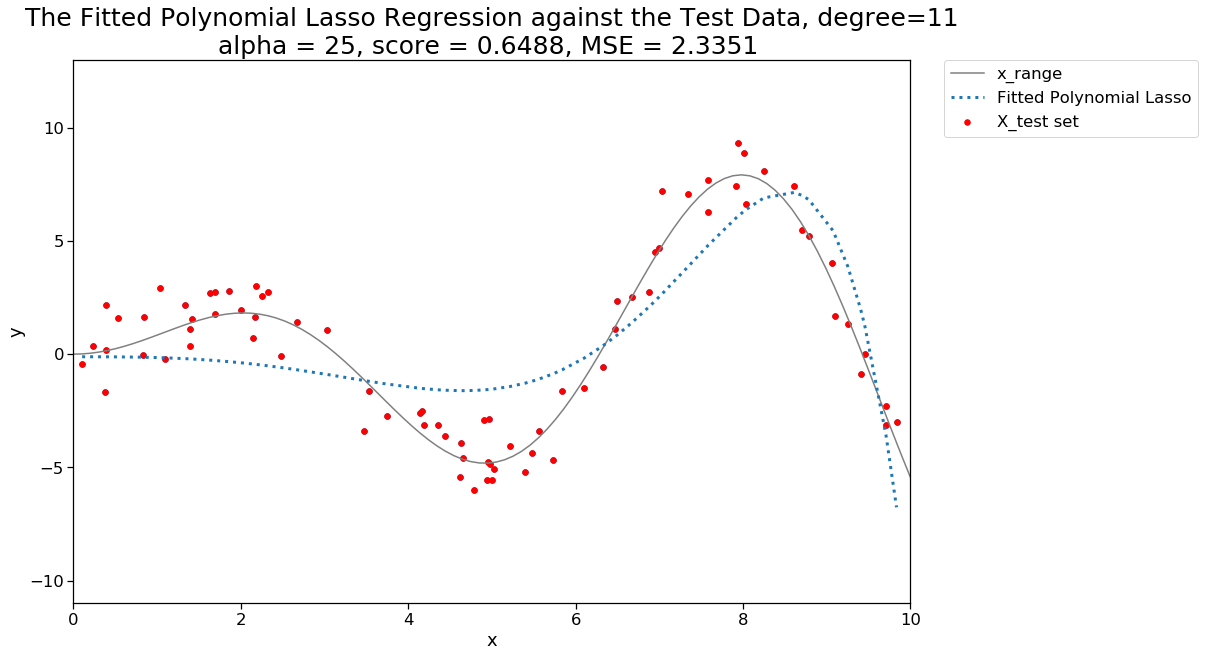

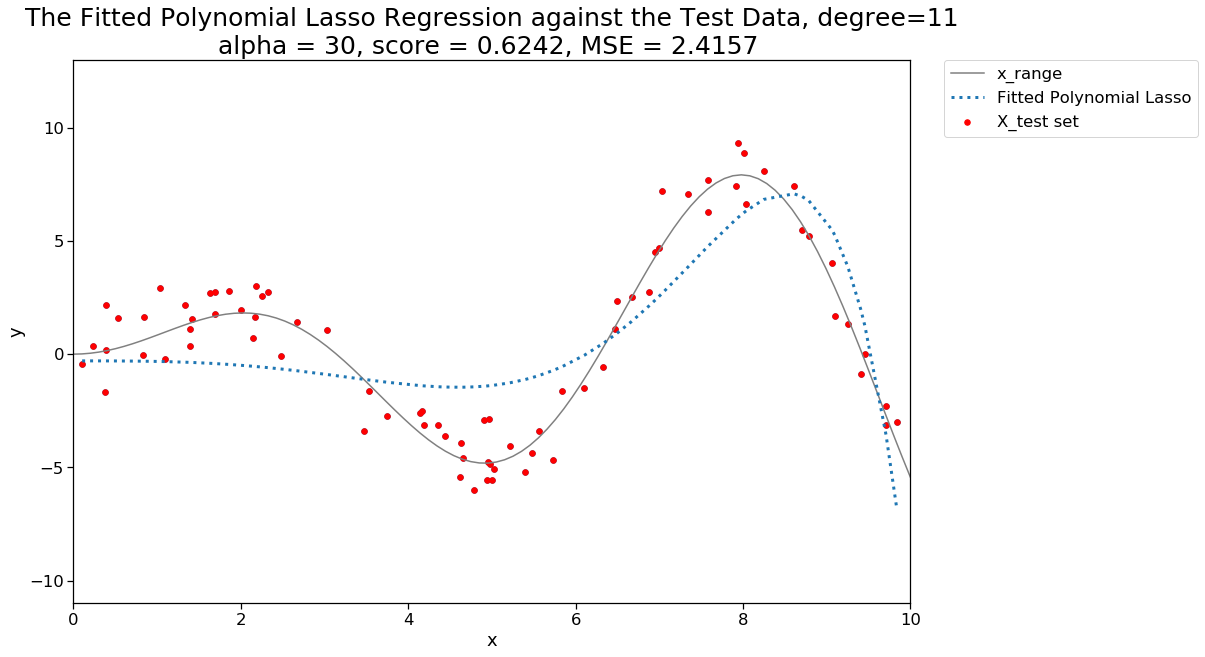

In [71]:
alphas = [0.1,0.5,0,5,10,20,25,30]

poly_features = PolynomialFeatures(degree=11)
X_test_poly = poly_features.fit_transform(X_test)

for i in alphas:
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_test_poly, y_test)
    y_test_pred_lasso = lasso_model.predict(X_test_poly)

    #calculating accurasy and mse
    test_score = lasso_model.score(X_test_poly, y_test)
    test_mse = mean_squared_error(y_test, y_test_pred_lasso)
    
    #Plot the fitted polynomial against the training data
    idxs = X_test.flatten().argsort()
    y_test_pred_lasso = y_test_pred_lasso[idxs]
    plt.figure(figsize = (15,10))
    plot_fit(plt.gca(), X_test, y_test)
    plt.scatter(X_test,y_test,color='r',s=30,label='X_test set')
    plt.plot(X_test[idxs], \
             y_test_pred_lasso,linestyle=':', \
             label='Fitted Polynomial Lasso', linewidth=3)
    plt.title(f'The Fitted Polynomial Lasso Regression against the Test Data, degree=11\nalpha = {str(i)}, score = {round(test_score, 4)}, MSE = {round(np.sqrt(test_mse),4)} ',fontsize=25)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left', borderaxespad=0.);
        

/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.45193436777493, tolerance: 0.02474273826640057
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.78266962833003, tolerance: 0.02474273826640057
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.12457717564598, tolerance: 0.02474273826640057
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

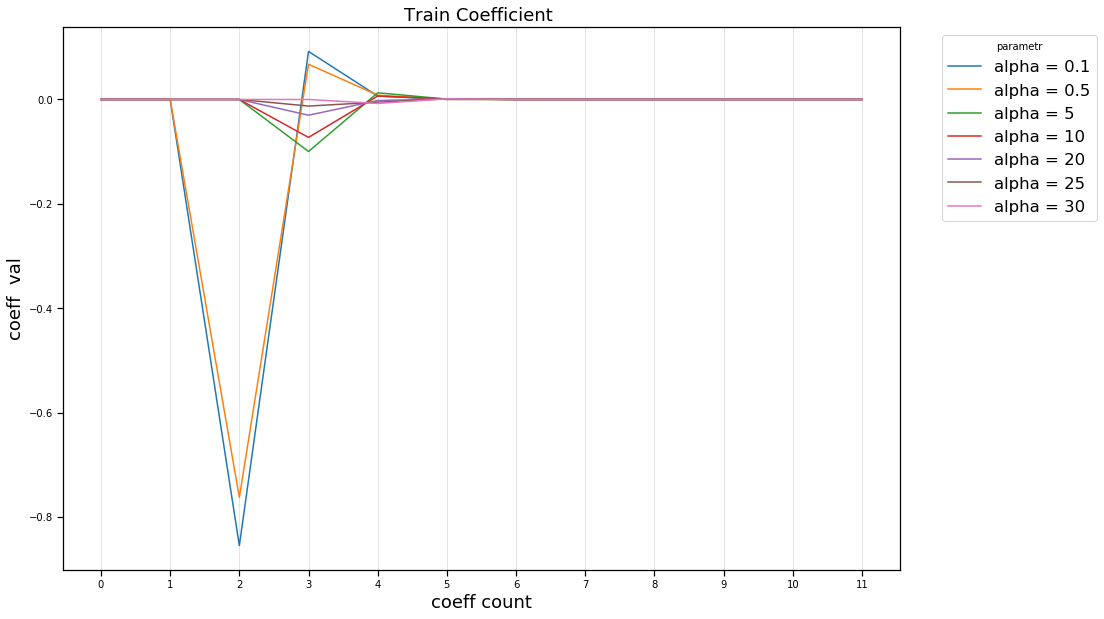

In [16]:
fig, ax = plt.subplots(figsize=(15,10))  
alphas = [0.1,0.5,5,10,20,25,30]

for i in alphas:
    lasso_model = Lasso(alpha=i).fit(X_train_poly, y_train)
    plt.plot(range(len(lasso_model.coef_.flatten())),lasso_model.coef_.flatten().copy(),label='alpha = ' +str(i))
    
ax.set(xlabel='coeff count', ylabel='coeff  val',
title='Train Coefficient ')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title = 'parametr', bbox_to_anchor=(1.04, 1),loc='upper left')
locator = ticker.IndexLocator(base = 1, offset = 0)
ax.xaxis.set_major_locator(locator)
ax.grid(axis='x', color='grey', alpha=0.2);


/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.57496744392483, tolerance: 0.1242193956332066
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.79268331404182, tolerance: 0.1242193956332066
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.16036570890867, tolerance: 0.1242193956332066
  positive)
/home/gal/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

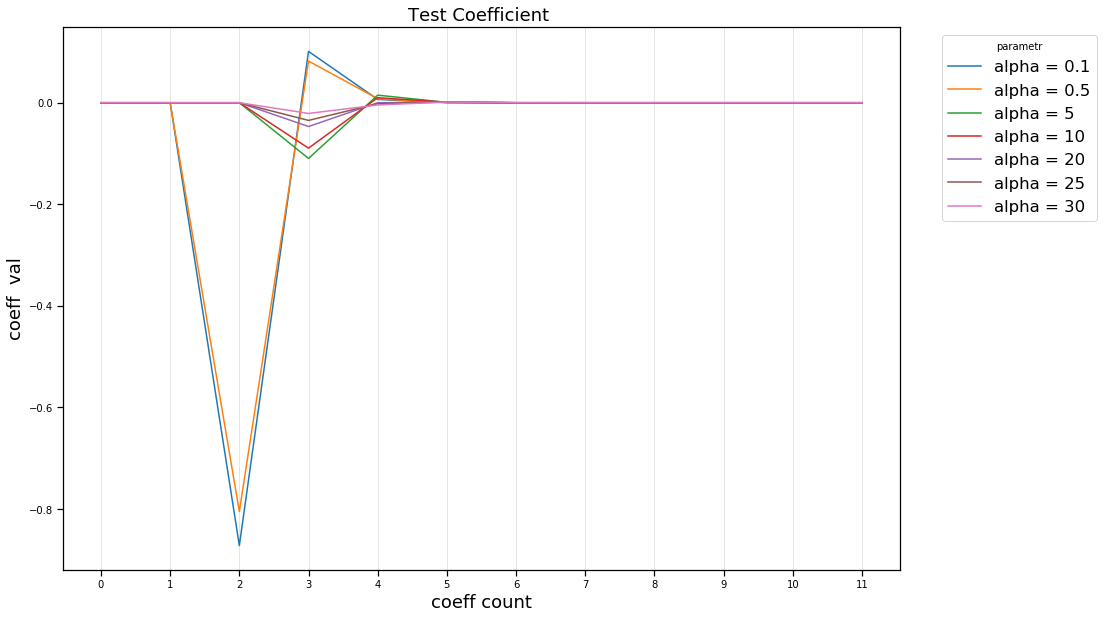

In [17]:
fig, ax = plt.subplots(figsize=(15,10))  
alphas = [0.1,0.5,5,10,20,25,30]

for i in alphas:
    lasso_model = Lasso(alpha=i).fit(X_test_poly, y_test)
    plt.plot(range(len(lasso_model.coef_.flatten())),lasso_model.coef_.flatten().copy(),label='alpha = ' +str(i))
    
ax.set(xlabel='coeff count', ylabel='coeff  val',
title='Test Coefficient ')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title = 'parametr', bbox_to_anchor=(1.04, 1),loc='upper left')
locator = ticker.IndexLocator(base = 1, offset = 0)
ax.xaxis.set_major_locator(locator)
ax.grid(axis='x', color='grey', alpha=0.2);


Regularization, significantly reduces the variance of the model, without substantial increase in its bias. So the tuning parameter λ, used in the regularization techniques described above, controls the impact on bias and variance. As the value of λ rises, it reduces the value of coefficients and thus reducing the variance. Till a point, this increase in λ is beneficial as it is only reducing the variance(hence avoiding overfitting), without loosing any important properties in the data. But after certain value, the model starts loosing important properties, giving rise to bias in the model and thus underfitting. Therefore, the value of λ should be carefully selected.

Ridge Regression gives better result than Lasso Regression in our case